# Raw time series data from various market brokers / APIs

In [1]:
from nsepython import nse_eq

# Get Tata Motors data
data = nse_eq("TATAMOTORS")
print(data)

{'info': {'symbol': 'TATAMOTORS', 'companyName': 'Tata Motors Limited', 'industry': 'Passenger Cars & Utility Vehicles', 'activeSeries': ['EQ', 'T0'], 'debtSeries': [], 'isFNOSec': True, 'isCASec': False, 'isSLBSec': True, 'isDebtSec': False, 'isSuspended': False, 'tempSuspendedSeries': [], 'isETFSec': False, 'isDelisted': False, 'isin': 'INE155A01022', 'slb_isin': 'INE155A01022', 'listingDate': '1998-07-22', 'isMunicipalBond': False, 'isHybridSymbol': False, 'isTop10': False, 'identifier': 'TATAMOTORSEQN'}, 'metadata': {'series': 'EQ', 'symbol': 'TATAMOTORS', 'isin': 'INE155A01022', 'status': 'Listed', 'listingDate': '22-Jul-1998', 'industry': 'Passenger Cars & Utility Vehicles', 'lastUpdateTime': '26-Aug-2025 16:00:00', 'pdSectorPe': 11.49, 'pdSymbolPe': 11.78, 'pdSectorInd': 'NIFTY 50', 'pdSectorIndAll': ['NIFTY 50', 'NIFTY500 VALUE 50', 'NIFTY50 EQUAL WEIGHT', 'NIFTY50 VALUE 20', 'NIFTY INDIA MANUFACTURING', 'NIFTY LARGEMIDCAP 250', 'NIFTY100 ESG SECTOR LEADERS', 'NIFTY500 MULTICAP

In [2]:
import yfinance as yf
import pandas as pd

In [3]:
# Example: Apple (AAPL)
ticker = "AAPL"

# Get last 1 day of data with 1-minute interval
df = yf.download(ticker, period="1d", interval="10m")

print(df.head())

C:\Users\amans\AppData\Local\Temp\ipykernel_12260\2730493593.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1d", interval="10m")
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFPricesMissingError('possibly delisted; no price data found  (period=1d) (Yahoo error = "Invalid input - interval=10m is not supported. Valid intervals: , 2m, 5m, 15m, 30m, 60m, 90m, 1h, 4h, 1d, 5d, 1wk, 1mo, 3mo]")')


Empty DataFrame
Columns: [(Adj Close, AAPL), (Close, AAPL), (High, AAPL), (Low, AAPL), (Open, AAPL), (Volume, AAPL)]
Index: []


In [4]:
df.columns

MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [5]:
df.shape

(0, 6)

In [14]:
!pip install pandas_ta

You should consider upgrading via the 'F:\quantconnect_chatbot\Quantconnect_chatbot\backend_venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [6]:
# Lets first download the snp-global 500 dataset.

In [ ]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf

# import pandas_ta
import warnings

warnings.filterwarnings("ignore")

import requests

url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
sp500 = pd.read_html(response.text)[0]

sp500["Symbol"] = sp500["Symbol"].str.replace(".", "-")

symbols_list = sp500["Symbol"].unique().tolist()

end_date = "2025-08-27"

start_date = pd.to_datetime(end_date) - pd.DateOffset(365 * 12)

df = yf.download(tickers=symbols_list, start=start_date, end=end_date).stack()

df.index.names = ["date", "ticker"]

df.columns = df.columns.str.lower()

df

[*********************100%***********************]  504 of 504 completed
[*********************103%************************]  518 of 504 completed

Price                   close        high         low        open     volume
date       ticker                                                           
2013-08-30 AIG      35.597900   35.789452   35.391025   35.735818  6442200.0
           AKAM     45.980000   46.490002   45.820000   46.490002  1068500.0
           ALGN     43.549999   44.150002   43.369999   43.660000   513200.0
           AMP      66.803177   67.663903   66.384445   67.570850   976000.0
           APD      70.655701   71.036166   70.206061   70.925486  1021869.0
...                       ...         ...         ...         ...        ...
2025-08-26 XYZ      78.779999   79.010002   77.730003   78.459999  5126600.0
           YUM     147.029999  147.970001  145.979996  146.919998  1664900.0
           ZBH     107.540001  108.290001  106.750000  107.010002  1792700.0
           ZBRA    320.579987  324.130005  318.179993  319.869995   619200.0
           ZTS     154.789993  156.320007  154.509995  155.380005  3614300.0

[1084585 rows x 5 columns]

[*********************103%************************]  519 of 504 completed

[****************************************181%*******************************************]  912 of 504 completed

In [22]:
df.columns

Index(['close', 'high', 'low', 'open', 'volume'], dtype='object', name='Price')

In [23]:
df.head(20)

Price                   close        high         low        open     volume
date       ticker                                                           
2013-08-30 AIG      35.597900   35.789452   35.391025   35.735818  6442200.0
           AKAM     45.980000   46.490002   45.820000   46.490002  1068500.0
           ALGN     43.549999   44.150002   43.369999   43.660000   513200.0
           AMP      66.803177   67.663903   66.384445   67.570850   976000.0
           APD      70.655701   71.036166   70.206061   70.925486  1021869.0
           ARE      40.809937   41.418745   40.690824   41.226838   407400.0
           AXON     11.640000   12.120000   11.600000   12.000000  1739700.0
           AZO     419.940002  420.820007  416.049988  419.450012   223600.0
           BALL     19.792229   20.015014   19.738761   19.966003  1337000.0
           BKNG    926.779968  934.423057  923.363265  930.206496   383100.0
           BLK     194.069473  195.985423  193.264317  195.046081   573700.0
           CAG      17.717684   17.901043   17.675774   17.843416  4096194.0
           CAH      36.330791   36.439178   36.171828   36.439178  1196400.0
           CBRE     21.870001   21.910000   21.629999   21.830000  3065700.0
           CCI      43.940998   44.460036   43.808074   44.371420  1303500.0
           CDNS     13.470000   13.680000   13.420000   13.680000  3717900.0
           CF       27.506063   27.696817   27.344213   27.438142  3296500.0
           CMS      18.368029   18.520345   18.284946   18.374952  2004300.0
           COR      41.125313   41.464894   40.923011   41.320391   871700.0
           CPRT      3.971250    4.050000    3.963750    4.032500  2605600.0

In [24]:
df.shape

(1084585, 5)

In [25]:
!pip install pandas_ta

You should consider upgrading via the 'F:\quantconnect_chatbot\Quantconnect_chatbot\backend_venv\Scripts\python.exe -m pip install --upgrade pip' command.


### 

In [ ]:
import numpy as np
import pandas as pd

# Standardize column names
df.columns = [col.lower().replace(" ", "_") for col in df.columns]

# -------------------------------
# 1. Garman-Klass Volatility
# -------------------------------
df["garman_klass_vol"] = ((np.log(df["high"]) - np.log(df["low"])) ** 2) / 2 - (
    2 * np.log(2) - 1
) * ((np.log(df["close"]) - np.log(df["open"])) ** 2)


# -------------------------------
# 2. Relative Strength Index (RSI)
# -------------------------------
def rsi(series, length=20):
    delta = series.diff()
    gain = delta.clip(lower=0).rolling(length).mean()
    loss = -delta.clip(upper=0).rolling(length).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))


df["rsi"] = df.groupby(level=1)["close"].transform(lambda x: rsi(x, 20))


# -------------------------------
# 3. Bollinger Bands (log prices)
# -------------------------------
def bollinger_bands(series, length=20, num_std=2):
    log_series = np.log1p(series)
    mid = log_series.rolling(length).mean()
    std = log_series.rolling(length).std()
    upper = mid + num_std * std
    lower = mid - num_std * std
    return lower, mid, upper


df["bb_low"] = df.groupby(level=1)["close"].transform(
    lambda x: bollinger_bands(x, 20)[0]
)
df["bb_mid"] = df.groupby(level=1)["close"].transform(
    lambda x: bollinger_bands(x, 20)[1]
)
df["bb_high"] = df.groupby(level=1)["close"].transform(
    lambda x: bollinger_bands(x, 20)[2]
)


# -------------------------------
# 4. Average True Range (ATR)
# -------------------------------
def compute_atr(stock_data, length=14):
    high, low, close = stock_data["high"], stock_data["low"], stock_data["close"]
    prev_close = close.shift(1)
    tr = pd.concat(
        [(high - low), (high - prev_close).abs(), (low - prev_close).abs()], axis=1
    ).max(axis=1)
    atr = tr.rolling(length).mean()
    return (atr - atr.mean()) / atr.std()


df["atr"] = df.groupby(level=1, group_keys=False).apply(compute_atr)


# -------------------------------
# 5. MACD (Moving Average Convergence Divergence)
# -------------------------------
def compute_macd(series, fast=12, slow=26, signal=9):
    ema_fast = series.ewm(span=fast, adjust=False).mean()
    ema_slow = series.ewm(span=slow, adjust=False).mean()
    macd = ema_fast - ema_slow
    return (macd - macd.mean()) / macd.std()


df["macd"] = df.groupby(level=1, group_keys=False)["close"].apply(compute_macd)

# -------------------------------
# 6. Dollar Volume
# -------------------------------
df["dollar_volume"] = (df["close"] * df["volume"]) / 1e6

In [34]:
df.head(20)

close        high         low        open     volume  \
date       ticker                                                              
2013-08-30 AIG      35.597900   35.789452   35.391025   35.735818  6442200.0   
           AKAM     45.980000   46.490002   45.820000   46.490002  1068500.0   
           ALGN     43.549999   44.150002   43.369999   43.660000   513200.0   
           AMP      66.803177   67.663903   66.384445   67.570850   976000.0   
           APD      70.655701   71.036166   70.206061   70.925486  1021869.0   
           ARE      40.809937   41.418745   40.690824   41.226838   407400.0   
           AXON     11.640000   12.120000   11.600000   12.000000  1739700.0   
           AZO     419.940002  420.820007  416.049988  419.450012   223600.0   
           BALL     19.792229   20.015014   19.738761   19.966003  1337000.0   
           BKNG    926.779968  934.423057  923.363265  930.206496   383100.0   
           BLK     194.069473  195.985423  193.264317  195.046081   573700.0   
           CAG      17.717684   17.901043   17.675774   17.843416  4096194.0   
           CAH      36.330791   36.439178   36.171828   36.439178  1196400.0   
           CBRE     21.870001   21.910000   21.629999   21.830000  3065700.0   
           CCI      43.940998   44.460036   43.808074   44.371420  1303500.0   
           CDNS     13.470000   13.680000   13.420000   13.680000  3717900.0   
           CF       27.506063   27.696817   27.344213   27.438142  3296500.0   
           CMS      18.368029   18.520345   18.284946   18.374952  2004300.0   
           COR      41.125313   41.464894   40.923011   41.320391   871700.0   
           CPRT      3.971250    4.050000    3.963750    4.032500  2605600.0   

                   garman_klass_vol  rsi  bb_low  bb_mid  bb_high  atr  \
date       ticker                                                        
2013-08-30 AIG             0.000057  NaN     NaN     NaN      NaN  NaN   
           AKAM            0.000058  NaN     NaN     NaN      NaN  NaN   
           ALGN            0.000156  NaN     NaN     NaN      NaN  NaN   
           AMP             0.000132  NaN     NaN     NaN      NaN  NaN   
           APD             0.000063  NaN     NaN     NaN      NaN  NaN   
           ARE             0.000117  NaN     NaN     NaN      NaN  NaN   
           AXON            0.000603  NaN     NaN     NaN      NaN  NaN   
           AZO             0.000064  NaN     NaN     NaN      NaN  NaN   
           BALL            0.000067  NaN     NaN     NaN      NaN  NaN   
           BKNG            0.000066  NaN     NaN     NaN      NaN  NaN   
           BLK             0.000088  NaN     NaN     NaN      NaN  NaN   
           CAG             0.000061  NaN     NaN     NaN      NaN  NaN   
           CAH             0.000024  NaN     NaN     NaN      NaN  NaN   
           CBRE            0.000081  NaN     NaN     NaN      NaN  NaN   
           CCI             0.000072  NaN     NaN     NaN      NaN  NaN   
           CDNS            0.000092  NaN     NaN     NaN      NaN  NaN   
           CF              0.000080  NaN     NaN     NaN      NaN  NaN   
           CMS             0.000082  NaN     NaN     NaN      NaN  NaN   
           COR             0.000078  NaN     NaN     NaN      NaN  NaN   
           CPRT            0.000141  NaN     NaN     NaN      NaN  NaN   

                       macd  dollar_volume  
date       ticker                           
2013-08-30 AIG    -0.119033     229.328794  
           AKAM   -0.046022      49.129630  
           ALGN   -0.027263      22.349860  
           AMP    -0.239755      65.199901  
           APD    -0.151240      72.200870  
           ARE    -0.043970      16.625968  
           AXON   -0.243742      20.250109  
           AZO    -0.350569      93.898585  
           BALL   -0.084069      26.462210  
           BKNG   -0.238512     355.049406  
           BLK    -0.213733     111.337657  
           CAG    -0.009041      72.575070  
    

In [35]:
df.columns

Index(['close', 'high', 'low', 'open', 'volume', 'garman_klass_vol', 'rsi',
       'bb_low', 'bb_mid', 'bb_high', 'atr', 'macd', 'dollar_volume'],
      dtype='object')

# 3.Aggregrate to monthly level and filter top 150 most liquid stocks for each month.

     to reduce training time and experiment with features and strategies, we convert the business-daily data to month -end frequency.


In [ ]:
last_cols = [
    c
    for c in df.columns.unique(0)
    if c not in ["dollar_volume", "volume", "open", "high", "low", "colse"]
]

In [39]:
last_cols

['close',
 'garman_klass_vol',
 'rsi',
 'bb_low',
 'bb_mid',
 'bb_high',
 'atr',
 'macd']

In [ ]:
# data = (pd.concat([df.unstack]))

df.unstack("ticker")["dollar_volume"].resample("M").mean().stack("ticker").to_frame(
    "dollar_volume"
)
print(df)

                        close        high         low        open     volume  \
date       ticker                                                              
2013-08-30 AIG      35.597900   35.789452   35.391025   35.735818  6442200.0   
           AKAM     45.980000   46.490002   45.820000   46.490002  1068500.0   
           ALGN     43.549999   44.150002   43.369999   43.660000   513200.0   
           AMP      66.803177   67.663903   66.384445   67.570850   976000.0   
           APD      70.655701   71.036166   70.206061   70.925486  1021869.0   
...                       ...         ...         ...         ...        ...   
2025-08-26 XYZ      78.779999   79.010002   77.730003   78.459999  5126600.0   
           YUM     147.029999  147.970001  145.979996  146.919998  1664900.0   
           ZBH     107.540001  108.290001  106.750000  107.010002  1792700.0   
           ZBRA    320.579987  324.130005  318.179993  319.869995   619200.0   
           ZTS     154.789993  156.32000

In [ ]:
print(df.unstack()[last_cols].resample("M").last().stack("ticker"))

                        close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2013-08-31 AIG      35.597900          0.000057        NaN       NaN   
           AKAM     45.980000          0.000058        NaN       NaN   
           ALGN     43.549999          0.000156        NaN       NaN   
           AMP      66.803177          0.000132        NaN       NaN   
           APD      70.655701          0.000063        NaN       NaN   
...                       ...               ...        ...       ...   
2025-08-31 XYZ      78.779999          0.000127  51.133783  4.295000   
           YUM     147.029999          0.000091  52.616698  4.941621   
           ZBH     107.540001          0.000093  71.202435  4.492772   
           ZBRA    320.579987          0.000170  46.492226  5.702086   
           ZTS     154.789993          0.000062  55.119177  4.976399   

                     bb_mid   bb_high       atr      macd  
dat

In [ ]:
data = (
    pd.concat(
        [
            df.unstack("ticker")["dollar_volume"]
            .resample("M")
            .mean()
            .stack("ticker")
            .to_frame("dollar_volume"),
            df.unstack()[last_cols].resample("M").last().stack("ticker"),
        ],
        axis=1,
    )
).dropna()

data

dollar_volume       close  garman_klass_vol        rsi  \
date       ticker                                                           
2013-09-30 AIG        340.461770   37.336464          0.000135  62.549012   
           AKAM        96.113457   51.700001          0.000183  77.984368   
           ALGN        27.175022   48.099998          0.000326  74.227890   
           AMP         71.444679   70.626053          0.000093  68.381946   
           APD         87.500260   74.200035          0.000053  61.895505   
...                          ...         ...               ...        ...   
2025-08-31 XYZ        648.108233   78.779999          0.000127  51.133783   
           YUM        329.910418  147.029999          0.000091  52.616698   
           ZBH        179.733923  107.540001          0.000093  71.202435   
           ZBRA       225.454003  320.579987          0.000170  46.492226   
           ZTS        511.296601  154.789993          0.000062  55.119177   

                     bb_low    bb_mid   bb_high       atr      macd  
date       ticker                                                    
2013-09-30 AIG     3.628724  3.658987  3.689250 -1.031447  0.342043  
           AKAM    3.867243  3.943887  4.020530 -1.222533  0.859804  
           ALGN    3.816439  3.868772  3.921106 -1.156936  0.066868  
           AMP     4.223343  4.267551  4.311758 -1.064976 -0.036577  
           APD     4.275680  4.314263  4.352846 -0.970255  0.119043  
...                     ...       ...       ...       ...       ...  
2025-08-31 XYZ     4.295000  4.343076  4.391152 -0.539398  0.255131  
           YUM     4.941621  4.987381  5.033141  1.327412  0.291514  
           ZBH     4.492772  4.612627  4.732482 -0.063827  1.495592  
           ZBRA    5.702086  5.774288  5.846490  0.721971 -0.251502  
           ZTS     4.976399  5.026007  5.075615 -0.323729  0.207828  

[51811 rows x 9 columns]

In [ ]:
# calculate 5-year rolling average of dollar volume for each stocks before filtering.

data["dollar_volume"] = (
    data.loc[:, "dollar_volume"]
    .unstack("ticker")
    .rolling(5 * 12, min_periods=12)
    .mean()
    .stack()
)
print(data["dollar_volume"])

date        ticker
2013-09-30  AIG               NaN
            AKAM              NaN
            ALGN              NaN
            AMP               NaN
            APD               NaN
                         ...     
2025-08-31  XYZ       1204.245016
            YUM        215.866564
            ZBH        180.552262
            ZBRA       135.671384
            ZTS        370.746294
Name: dollar_volume, Length: 51811, dtype: float64


In [ ]:
data["dollar_volume_rank"] = data.groupby("date")["dollar_volume"].rank(ascending=False)

print(data["dollar_volume_rank"])

date        ticker
2013-09-30  AIG         NaN
            AKAM        NaN
            ALGN        NaN
            AMP         NaN
            APD         NaN
                      ...  
2025-08-31  XYZ        34.0
            YUM       276.0
            ZBH       319.0
            ZBRA      387.0
            ZTS       153.0
Name: dollar_volume_rank, Length: 51811, dtype: float64


In [ ]:
data["dollar_volume"] = (
    data.loc[:, "dollar_volume"]
    .unstack("ticker")
    .rolling(5 * 12, min_periods=12)
    .mean()
    .stack()
)

data["dollar_vol_rank"] = data.groupby("date")["dollar_volume"].rank(ascending=False)

data = data[data["dollar_vol_rank"] < 150].drop(
    ["dollar_volume", "dollar_vol_rank"], axis=1
)

data

close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2015-07-31 AIG      50.004230          0.000028  62.200977  3.890272   
           AKAM     76.709999          0.000394  70.531362  4.240418   
           ALGN     62.700001          0.000265  48.273842  4.114337   
           AMP     101.391525          0.000018  52.645855  4.592638   
           APD     103.351868          0.000166  57.467173  4.544804   
...                       ...               ...        ...       ...   
2025-08-31 WFC      81.510002          0.000093  48.374067  4.338053   
           WMT      96.050003          0.000058  45.088649  4.564311   
           WYNN    119.080002          0.000094  66.807989  4.648287   
           XOM     111.489998          0.000085  48.924668  4.645715   
           XYZ      78.779999          0.000127  51.133783  4.295000   

                     bb_mid   bb_high       atr      macd  dollar_volume_rank  
date       ticker                                                              
2015-07-31 AIG     3.921680  3.953089 -1.069623  0.461084                 7.0  
           AKAM    4.293105  4.345791  0.186865  0.380122                33.0  
           ALGN    4.165571  4.216805 -1.080912 -0.033635                65.0  
           AMP     4.622245  4.651851 -0.915382 -0.255743                40.0  
           APD     4.595163  4.645522 -0.708096 -0.340129                31.0  
...                     ...       ...       ...       ...                 ...  
2025-08-31 WFC     4.374501  4.410948  1.080023 -0.077943                42.0  
           WMT     4.615407  4.666503  1.892114 -0.443486                37.0  
           WYNN    4.712531  4.776776 -0.492098  0.907782               237.0  
           XOM     4.688812  4.731909  0.006603  0.231685                18.0  
           XYZ     4.343076  4.391152 -0.539398  0.255131                34.0  

[15310 rows x 9 columns]

# 4. Calculate Monthly Returns for different time horizons as features.

### To capture time series dynamics that reflect , for example, momentum patterns, we computer historical return using the method .pct_change(lag), that is,
return over various monthly periods as identified by lages.

In [ ]:
def calculate_returns(df: pd.DataFrame):
    outlier_cutoff = 0.0458
    lags = [1, 2, 3, 4, 5, 6, 8, 9, 12]

    for item in lags:
        df[f"return_{item}m"] = (
            df["adj close"]
            .pct_change(item)
            .pipe(
                lambda x: x.clip(
                    lower=x.quantile(outlier_cutoff),
                    upper=x.quantile(1 - outlier_cutoff),
                )
            )
            .add(1)
            .pow(1 / item)
            .sub(1)
        )

        return df

In [53]:
df

close        high         low        open     volume  \
date       ticker                                                              
2013-08-30 AIG      35.597900   35.789452   35.391025   35.735818  6442200.0   
           AKAM     45.980000   46.490002   45.820000   46.490002  1068500.0   
           ALGN     43.549999   44.150002   43.369999   43.660000   513200.0   
           AMP      66.803177   67.663903   66.384445   67.570850   976000.0   
           APD      70.655701   71.036166   70.206061   70.925486  1021869.0   
...                       ...         ...         ...         ...        ...   
2025-08-26 XYZ      78.779999   79.010002   77.730003   78.459999  5126600.0   
           YUM     147.029999  147.970001  145.979996  146.919998  1664900.0   
           ZBH     107.540001  108.290001  106.750000  107.010002  1792700.0   
           ZBRA    320.579987  324.130005  318.179993  319.869995   619200.0   
           ZTS     154.789993  156.320007  154.509995  155.380005  3614300.0   

                   garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2013-08-30 AIG             0.000057        NaN       NaN       NaN       NaN   
           AKAM            0.000058        NaN       NaN       NaN       NaN   
           ALGN            0.000156        NaN       NaN       NaN       NaN   
           AMP             0.000132        NaN       NaN       NaN       NaN   
           APD             0.000063        NaN       NaN       NaN       NaN   
...                             ...        ...       ...       ...       ...   
2025-08-26 XYZ             0.000127  51.133783  4.295000  4.343076  4.391152   
           YUM             0.000091  52.616698  4.941621  4.987381  5.033141   
           ZBH             0.000093  71.202435  4.492772  4.612627  4.732482   
           ZBRA            0.000170  46.492226  5.702086  5.774288  5.846490   
           ZTS             0.000062  55.119177  4.976399  5.026007  5.075615   

                        atr      macd  dollar_volume  
date       ticker                                     
2013-08-30 AIG          NaN -0.119033     229.328794  
           AKAM         NaN -0.046022      49.129630  
           ALGN         NaN -0.027263      22.349860  
           AMP          NaN -0.239755      65.199901  
           APD          NaN -0.151240      72.200870  
...                     ...       ...            ...  
2025-08-26 XYZ    -0.539398  0.255131     403.873542  
           YUM     1.327412  0.291514     244.790245  
           ZBH    -0.063827  1.495592     192.786960  
           ZBRA    0.721971 -0.251502     198.503128  
           ZTS    -0.323729  0.207828     559.457473  

[1084585 rows x 13 columns]

In [ ]:
def calculate_returns(df):

    outlier_cutoff = 0.005

    lags = [1, 2, 3, 6, 9, 12]

    for lag in lags:

        df[f"return_{lag}m"] = (
            df["close"]
            .pct_change(lag)
            .pipe(
                lambda x: x.clip(
                    lower=x.quantile(outlier_cutoff),
                    upper=x.quantile(1 - outlier_cutoff),
                )
            )
            .add(1)
            .pow(1 / lag)
            .sub(1)
        )
    return df


data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()

data

close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2016-07-31 AIG      43.359455          0.000039  61.724500  3.737421   
           AKAM     50.529999          0.000224  32.670095  3.947805   
           ALGN     89.150002          0.000513  72.210730  4.395143   
           AMP      79.063187          0.000056  66.145490  4.287864   
           APD     111.089211          0.000131  69.523627  4.646990   
...                       ...               ...        ...       ...   
2025-08-31 WFC      81.510002          0.000093  48.374067  4.338053   
           WMT      96.050003          0.000058  45.088649  4.564311   
           WYNN    119.080002          0.000094  66.807989  4.648287   
           XOM     111.489998          0.000085  48.924668  4.645715   
           XYZ      78.779999          0.000127  51.133783  4.295000   

                     bb_mid   bb_high       atr      macd  dollar_volume_rank  \
date       ticker                                                               
2016-07-31 AIG     3.780253  3.823085 -1.356086  0.137872                 7.0   
           AKAM    4.038172  4.128538 -0.359581 -0.317030                34.0   
           ALGN    4.437647  4.480151 -1.087754  0.140535                69.0   
           AMP     4.361918  4.435972 -0.989781 -0.144401                43.0   
           APD     4.700142  4.753295 -1.042501  0.256096                29.0   
...                     ...       ...       ...       ...                 ...   
2025-08-31 WFC     4.374501  4.410948  1.080023 -0.077943                42.0   
           WMT     4.615407  4.666503  1.892114 -0.443486                37.0   
           WYNN    4.712531  4.776776 -0.492098  0.907782               237.0   
           XOM     4.688812  4.731909  0.006603  0.231685                18.0   
           XYZ     4.343076  4.391152 -0.539398  0.255131                34.0   

                   return_1m  return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                          
2016-07-31 AIG      0.029306  -0.027434  -0.006444  -0.004146  -0.014418   
           AKAM    -0.096549  -0.037817  -0.003016   0.017183  -0.020384   
           ALGN     0.106766   0.063445   0.072872   0.051016   0.034916   
           AMP      0.066667  -0.029095   0.002442   0.012092  -0.018595   
           APD      0.051957   0.026724   0.010124   0.029960   0.010139   
...                      ...        ...        ...        ...        ...   
2025-08-31 WFC      0.016853   0.011596   0.031153   0.008578   0.009378   
           WMT     -0.017408  -0.007729  -0.008327  -0.003131   0.005276   
           WYNN     0.094677   0.128797   0.096471   0.049943   0.027034   
           XOM      0.007949   0.021692   0.032272   0.003317  -0.003225   
           XYZ      0.019674   0.076904   0.084575   0.031772  -0.012906   

                   return_12m  
date       ticker              
2016-07-31 AIG      -0.011812  
           AKAM     -0.032216  
           ALGN      0.029764  
           AMP      -0.020515  
           APD       0.006034  
...                       ...  
2025-08-31 WFC       0.029958  
           WMT       0.019163  
           WYNN      0.038025  
           XOM      -0.001725  
           XYZ       0.014757  

[12457 rows x 15 columns]

# 5. Download Fama-French Factors and Calculate Rolling Factor Betas.
We will introduce the Fama—French data to estimate the exposure of assets to common risk factors using linear regression.

The five Fama—French factors, namely market risk, size, value, operating profitability, and investment have been shown empirically to explain asset returns and are commonly used to assess the risk/return profile of portfolios. Hence, it is natural to include past factor exposures as financial features in models.

We can access the historical factor returns using the pandas-datareader and estimate historical exposures using the RollingOLS rolling linear regression.

In [ ]:
factor_data = web.DataReader(
    "F-F_Research_Data_5_Factors_2x3", "famafrench", start="2010"
)[0].drop("RF", axis=1)


factor_data

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2010-01,-3.35,0.40,0.33,-1.08,0.51
2010-02,3.39,1.49,3.18,-0.29,1.42
2010-03,6.30,1.83,2.19,-0.61,1.74
2010-04,2.00,4.96,2.96,0.61,1.75
2010-05,-7.90,0.08,-2.48,1.30,-0.24
...,...,...,...,...,...
2025-02,-2.43,-4.91,4.91,1.10,3.06
2025-03,-6.39,-1.49,2.90,2.11,-0.47
2025-04,-0.84,-1.86,-3.40,-2.85,-2.67


In [ ]:
factor_data.index = factor_data.index.to_pydatetime()
factor_data = factor_data.resample("M").last().div(100)

factor_data.index.name = "date"

factor_data = factor_data.join(data["return_1m"]).sort_index()

factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2016-07-31 AIG     0.0394  0.0247 -0.0124  0.0131 -0.0116   0.029306
           AKAM    0.0394  0.0247 -0.0124  0.0131 -0.0116  -0.096549
           ALGN    0.0394  0.0247 -0.0124  0.0131 -0.0116   0.106766
           AMP     0.0394  0.0247 -0.0124  0.0131 -0.0116   0.066667
           APD     0.0394  0.0247 -0.0124  0.0131 -0.0116   0.051957
...                   ...     ...     ...     ...     ...        ...
2025-06-30 WFC     0.0486 -0.0002 -0.0160 -0.0319  0.0145   0.071410
           WMT     0.0486 -0.0002 -0.0160 -0.0319  0.0145  -0.009522
           WYNN    0.0486 -0.0002 -0.0160 -0.0319  0.0145   0.034570
           XOM     0.0486 -0.0002 -0.0160 -0.0319  0.0145   0.053763
           XYZ     0.0486 -0.0002 -0.0160 -0.0319  0.0145   0.100081

[12167 rows x 6 columns]

In [64]:
# Filter out stoks with less than 10 months of data

observations = factor_data.groupby(level=1).size()

observations

ticker
AAPL    60
ABBV    60
ABNB    20
ABT     60
ACN     60
        ..
WYNN    60
XOM     60
XYZ     60
YUM     36
ZBRA    36
Length: 235, dtype: int64

In [ ]:
valid_stocks = observations[observations >= 10]
valid_stocks

ticker
AAPL    60
ABBV    60
ABNB    20
ABT     60
ACN     60
        ..
WYNN    60
XOM     60
XYZ     60
YUM     36
ZBRA    36
Length: 233, dtype: int64

In [ ]:
factor_data = factor_data[
    factor_data.index.get_level_values("ticker").isin(valid_stocks.index)
]
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2016-07-31 AIG     0.0394  0.0247 -0.0124  0.0131 -0.0116   0.029306
           AKAM    0.0394  0.0247 -0.0124  0.0131 -0.0116  -0.096549
           ALGN    0.0394  0.0247 -0.0124  0.0131 -0.0116   0.106766
           AMP     0.0394  0.0247 -0.0124  0.0131 -0.0116   0.066667
           APD     0.0394  0.0247 -0.0124  0.0131 -0.0116   0.051957
...                   ...     ...     ...     ...     ...        ...
2025-06-30 WFC     0.0486 -0.0002 -0.0160 -0.0319  0.0145   0.071410
           WMT     0.0486 -0.0002 -0.0160 -0.0319  0.0145  -0.009522
           WYNN    0.0486 -0.0002 -0.0160 -0.0319  0.0145   0.034570
           XOM     0.0486 -0.0002 -0.0160 -0.0319  0.0145   0.053763
           XYZ     0.0486 -0.0002 -0.0160 -0.0319  0.0145   0.100081

[12156 rows x 6 columns]

In [67]:
# Calculate Rolling factors - betas

In [ ]:
betas = factor_data.groupby(level=1, group_keys=False).apply(
    lambda x: RollingOLS(
        endog=x["return_1m"],
        exog=sm.add_constant(x.drop("return_1m", axis=1)),
        window=min(24, x.shape[0]),
        min_nobs=len(x.columns) + 1,
    )
    .fit(params_only=True)
    .params.drop("const", axis=1)
)


betas

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2016-07-31 AIG          NaN       NaN       NaN       NaN       NaN
           AKAM         NaN       NaN       NaN       NaN       NaN
           ALGN         NaN       NaN       NaN       NaN       NaN
           AMP          NaN       NaN       NaN       NaN       NaN
           APD          NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2025-06-30 WFC     0.800623 -0.092902  0.524113 -1.716527 -0.053748
           WMT     0.551389  0.107217 -0.390105  0.259679 -0.913387
           WYNN    0.804111  0.355942 -1.117950  0.047714  1.765062
           XOM     0.330550 -0.272278  0.873621  0.680354  0.249376
           XYZ     2.142764  0.179483  0.119081 -4.326304 -0.240218

[12156 rows x 5 columns]

In [ ]:
data
print(data.columns)
print(data.info())

Index(['close', 'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid', 'bb_high',
       'atr', 'macd', 'dollar_volume_rank', 'return_1m', 'return_2m',
       'return_3m', 'return_6m', 'return_9m', 'return_12m', 'Mkt-RF', 'SMB',
       'HML', 'RMW', 'CMA'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12457 entries, (Timestamp('2016-07-31 00:00:00'), 'AIG') to (Timestamp('2025-08-31 00:00:00'), 'XYZ')
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   close               12457 non-null  float64
 1   garman_klass_vol    12457 non-null  float64
 2   rsi                 12457 non-null  float64
 3   bb_low              12457 non-null  float64
 4   bb_mid              12457 non-null  float64
 5   bb_high             12457 non-null  float64
 6   atr                 12457 non-null  float64
 7   macd                12457 non-null  float64
 8   dollar_volume_rank  12457 non-null  float64
 9  

## Join the rolling factors data to the main features dataframe.

In [ ]:
factors = ["Mkt-RF", "SMB", "HML", "RMW", "CMA"]

data = data.join(betas.groupby("ticker").shift(), rsuffix="_shifted")

data

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2018-07-31 AIG             0.000065  60.895129  3.808450  3.832719  3.856989   
           AKAM            0.000144  52.601524  4.311138  4.362077  4.413016   
           ALGN            0.000943  57.631695  5.819359  5.889375  5.959391   
           AMP             0.000094  57.017665  4.797396  4.834432  4.871468   
           APD             0.000166  67.933820  4.864575  4.899659  4.934743   
...                             ...        ...       ...       ...       ...   
2025-06-30 WFC             0.000101  65.362521  4.276808  4.337424  4.398040   
           WMT             0.000165  46.754138  4.545685  4.581647  4.617610   
           WYNN            0.000175  55.249915  4.414528  4.487547  4.560566   
           XOM             0.000030  59.765625  4.612267  4.685469  4.758670   
           XYZ             0.000143  65.637657  4.132886  4.178575  4.224264   

                        atr      macd  dollar_volume_rank  return_1m  \
date       ticker                                                      
2018-07-31 AIG    -0.830347 -0.019664                 7.0   0.041305   
           AKAM   -0.386686  0.077426                35.0   0.027721   
           ALGN    0.695337  0.407194                46.0   0.042409   
           AMP    -0.582739 -0.037202                44.0   0.041393   
           APD    -0.750930 -0.008063                31.0   0.054196   
...                     ...       ...                 ...        ...   
2025-06-30 WFC     0.857365  1.408933                40.0   0.071410   
           WMT     1.623778 -0.138627                36.0  -0.009522   
           WYNN   -0.962520  0.468239               226.0   0.034570   
           XOM     1.140408  0.696385                18.0   0.053763   
           XYZ    -0.809836  0.370105                30.0   0.100081   

                   return_2m  ...  Mkt-RF_shifted  SMB_shifted  HML_shifted  \
date       ticker             ...                                             
2018-07-31 AIG      0.025676  ...        0.880908    -0.959392     0.781577   
           AKAM    -0.000796  ...       -1.389892    -1.045969     1.571758   
           ALGN     0.036537  ...        2.870013     1.584492     0.331716   
           AMP      0.025077  ...        2.404416     0.635475     0.787206   
           APD      0.012087  ...        0.891641     0.283734     0.539841   
...                      ...  ...             ...          ...          ...   
2025-06-30 WFC      0.065121  ...        0.883414    -0.057805     0.438256   
           WMT      0.003933  ...        0.522655     0.128964    -0.531421   
           WYNN     0.081363  ...        0.869672     0.398380    -1.259800   
           XOM      0.014861  ...        0.406793    -0.306892     1.132141   
           XYZ      0.077865  ...        2.257307     0.280692    -0.265247   

                   RMW_shifted  CMA_shifted  Mkt-RF_shifted  SMB_shifted  \
date       ticker                                                          
2018-07-31 AIG       -1.212878     0.171857        0.880908    -0.959392   
           AKAM      -0.331379     0.424244       -1.389892    -1.045969   
           ALGN      -0.290282    -5.828701        2.870013     1.584492   
           AMP        0.181908     0.116511        2.404416     0.635475   
           APD        0.319496    -0.642437        0.891641     0.283734   
...                        ...          ...             ...          ...   
2025-06-30 WFC       -1.668170     0.068118        0.883414    -0.057805   
           WMT        0.050394    -0.645168        0.522655     0.128964   
           WYNN       0.002914     1.995599        0.869672     0.398380   
           XOM        1.104667    -0.251005        0.406793    -0.306892   
           XYZ       -4.558132     0.410258        2.257307     0.280692   

                   HML_s

In [87]:
data.columns

Index(['garman_klass_vol', 'rsi', 'bb_low', 'bb_mid', 'bb_high', 'atr', 'macd',
       'dollar_volume_rank', 'return_1m', 'return_2m', 'return_3m',
       'return_6m', 'return_9m', 'return_12m', 'Mkt-RF', 'SMB', 'HML', 'RMW',
       'CMA', 'Mkt-RF_shifted', 'SMB_shifted', 'HML_shifted', 'RMW_shifted',
       'CMA_shifted', 'Mkt-RF_shifted', 'SMB_shifted', 'HML_shifted',
       'RMW_shifted', 'CMA_shifted', 'Mkt-RF_shifted', 'SMB_shifted',
       'HML_shifted', 'RMW_shifted', 'CMA_shifted', 'Mkt-RF_shifted',
       'SMB_shifted', 'HML_shifted', 'RMW_shifted', 'CMA_shifted',
       'Mkt-RF_shifted', 'SMB_shifted', 'HML_shifted', 'RMW_shifted',
       'CMA_shifted', 'Mkt-RF_shifted', 'SMB_shifted', 'HML_shifted',
       'RMW_shifted', 'CMA_shifted'],
      dtype='object')

In [ ]:
data.loc[:, factors] = data.groupby("ticker", group_keys=False)[factors].apply(
    lambda x: x.fillna(x.mean())
)


data = data.dropna()

data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6653 entries, (Timestamp('2018-07-31 00:00:00'), 'AIG') to (Timestamp('2025-06-30 00:00:00'), 'XYZ')
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   garman_klass_vol    6653 non-null   float64
 1   rsi                 6653 non-null   float64
 2   bb_low              6653 non-null   float64
 3   bb_mid              6653 non-null   float64
 4   bb_high             6653 non-null   float64
 5   atr                 6653 non-null   float64
 6   macd                6653 non-null   float64
 7   dollar_volume_rank  6653 non-null   float64
 8   return_1m           6653 non-null   float64
 9   return_2m           6653 non-null   float64
 10  return_3m           6653 non-null   float64
 11  return_6m           6653 non-null   float64
 12  return_9m           6653 non-null   float64
 13  return_12m          6653 non-null   float64
 14  Mkt-RF              6653 no

# 6. For each month fit a K-Means Clustering Algorithm to group similar assets based on their features.
K-Means Clustering
You may want to initialize predefined centroids for each cluster based on your research.

For visualization purpose of this tutorial we will initially rely on the ‘k-means++’ initialization.

Then we will pre-define our centroids for each cluster.

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6653 entries, (Timestamp('2018-07-31 00:00:00'), 'AIG') to (Timestamp('2025-06-30 00:00:00'), 'XYZ')
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   garman_klass_vol    6653 non-null   float64
 1   rsi                 6653 non-null   float64
 2   bb_low              6653 non-null   float64
 3   bb_mid              6653 non-null   float64
 4   bb_high             6653 non-null   float64
 5   atr                 6653 non-null   float64
 6   macd                6653 non-null   float64
 7   dollar_volume_rank  6653 non-null   float64
 8   return_1m           6653 non-null   float64
 9   return_2m           6653 non-null   float64
 10  return_3m           6653 non-null   float64
 11  return_6m           6653 non-null   float64
 12  return_9m           6653 non-null   float64
 13  return_12m          6653 non-null   float64
 14  Mkt-RF              6653 no

In [ ]:
from sklearn.cluster import KMeans


def get_clusters(df, n_clusters=4):
    # select only numeric columns for clustering
    features = df.select_dtypes(include=["float64", "int64"])

    # run kmeans
    km = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    labels = km.fit_predict(features)

    df = df.copy()
    df["cluster"] = labels
    return df


# Drop old cluster if exists
data = data.drop("cluster", axis=1, errors="ignore")

# Apply per-date clustering
data = data.dropna().groupby("date", group_keys=False).apply(get_clusters)

data

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2018-07-31 AIG             0.000065  60.895129  3.808450  3.832719  3.856989   
           AKAM            0.000144  52.601524  4.311138  4.362077  4.413016   
           ALGN            0.000943  57.631695  5.819359  5.889375  5.959391   
           AMP             0.000094  57.017665  4.797396  4.834432  4.871468   
           APD             0.000166  67.933820  4.864575  4.899659  4.934743   
...                             ...        ...       ...       ...       ...   
2025-06-30 WFC             0.000101  65.362521  4.276808  4.337424  4.398040   
           WMT             0.000165  46.754138  4.545685  4.581647  4.617610   
           WYNN            0.000175  55.249915  4.414528  4.487547  4.560566   
           XOM             0.000030  59.765625  4.612267  4.685469  4.758670   
           XYZ             0.000143  65.637657  4.132886  4.178575  4.224264   

                        atr      macd  dollar_volume_rank  return_1m  \
date       ticker                                                      
2018-07-31 AIG    -0.830347 -0.019664                 7.0   0.041305   
           AKAM   -0.386686  0.077426                35.0   0.027721   
           ALGN    0.695337  0.407194                46.0   0.042409   
           AMP    -0.582739 -0.037202                44.0   0.041393   
           APD    -0.750930 -0.008063                31.0   0.054196   
...                     ...       ...                 ...        ...   
2025-06-30 WFC     0.857365  1.408933                40.0   0.071410   
           WMT     1.623778 -0.138627                36.0  -0.009522   
           WYNN   -0.962520  0.468239               226.0   0.034570   
           XOM     1.140408  0.696385                18.0   0.053763   
           XYZ    -0.809836  0.370105                30.0   0.100081   

                   return_2m  ...  SMB_shifted  HML_shifted  RMW_shifted  \
date       ticker             ...                                          
2018-07-31 AIG      0.025676  ...    -0.959392     0.781577    -1.212878   
           AKAM    -0.000796  ...    -1.045969     1.571758    -0.331379   
           ALGN     0.036537  ...     1.584492     0.331716    -0.290282   
           AMP      0.025077  ...     0.635475     0.787206     0.181908   
           APD      0.012087  ...     0.283734     0.539841     0.319496   
...                      ...  ...          ...          ...          ...   
2025-06-30 WFC      0.065121  ...    -0.057805     0.438256    -1.668170   
           WMT      0.003933  ...     0.128964    -0.531421     0.050394   
           WYNN     0.081363  ...     0.398380    -1.259800     0.002914   
           XOM      0.014861  ...    -0.306892     1.132141     1.104667   
           XYZ      0.077865  ...     0.280692    -0.265247    -4.558132   

                   CMA_shifted  Mkt-RF_shifted  SMB_shifted  HML_shifted  \
date       ticker                                                          
2018-07-31 AIG        0.171857        0.880908    -0.959392     0.781577   
           AKAM       0.424244       -1.389892    -1.045969     1.571758   
           ALGN      -5.828701        2.870013     1.584492     0.331716   
           AMP        0.116511        2.404416     0.635475     0.787206   
           APD       -0.642437        0.891641     0.283734     0.539841   
...                        ...             ...          ...          ...   
2025-06-30 WFC        0.068118        0.883414    -0.057805     0.438256   
           WMT       -0.645168        0.522655     0.128964    -0.531421   
           WYNN       1.995599        0.869672     0.398380    -1.259800   
           XOM       -0.251005        0.406793    -0.306892     1.132141   
           XYZ        0.410258        2.257307     0.280692    -0.265247   

                   RMW_shifted  CMA_shifted  cluster  
date    

In [ ]:
def plot_clusters(data):

    cluster_0 = data[data["cluster"] == 0]
    cluster_1 = data[data["cluster"] == 1]
    cluster_2 = data[data["cluster"] == 2]
    cluster_3 = data[data["cluster"] == 3]

    plt.scatter(
        cluster_0.iloc[:, 0], cluster_0.iloc[:, 6], color="red", label="cluster 0"
    )
    plt.scatter(
        cluster_1.iloc[:, 0], cluster_1.iloc[:, 6], color="green", label="cluster 1"
    )
    plt.scatter(
        cluster_2.iloc[:, 0], cluster_2.iloc[:, 6], color="blue", label="cluster 2"
    )
    plt.scatter(
        cluster_3.iloc[:, 0], cluster_3.iloc[:, 6], color="black", label="cluster 3"
    )

    plt.legend()
    plt.show()
    return

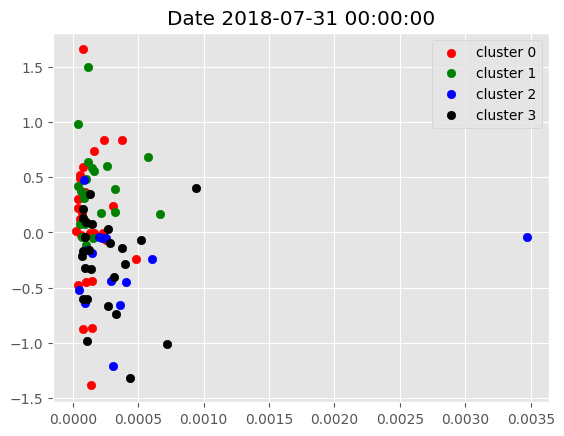

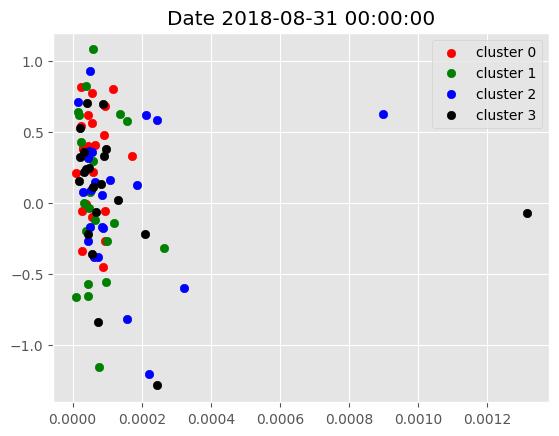

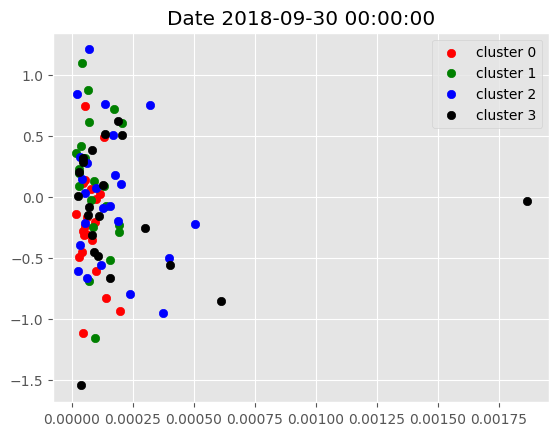

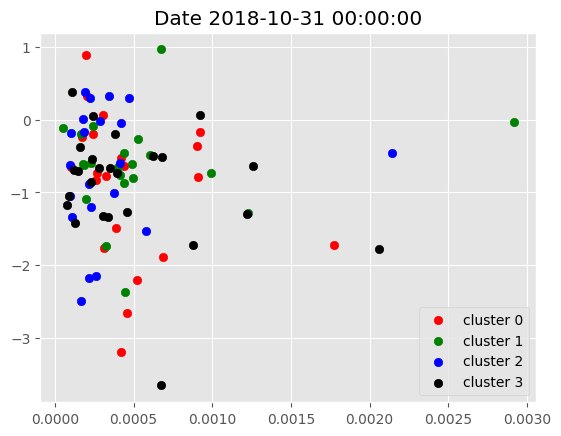

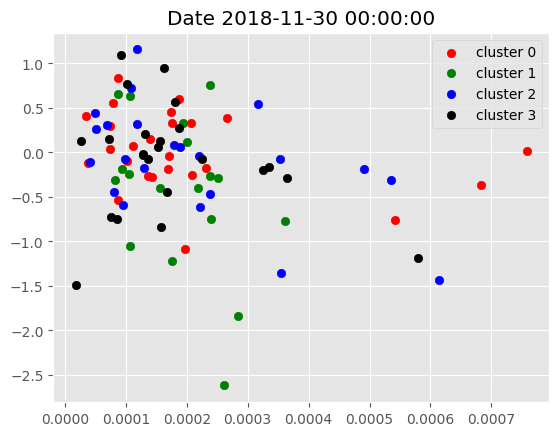

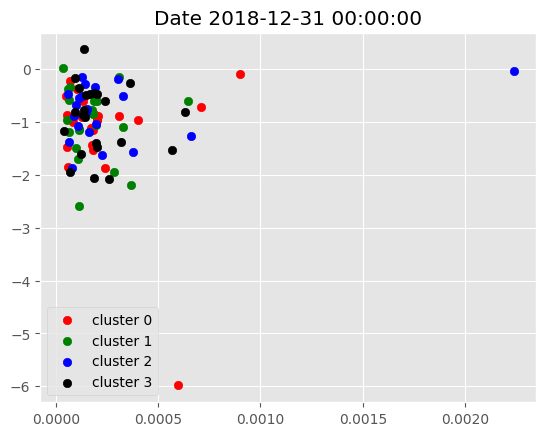

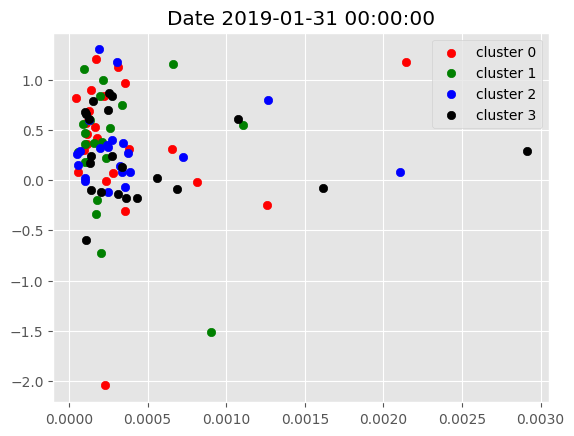

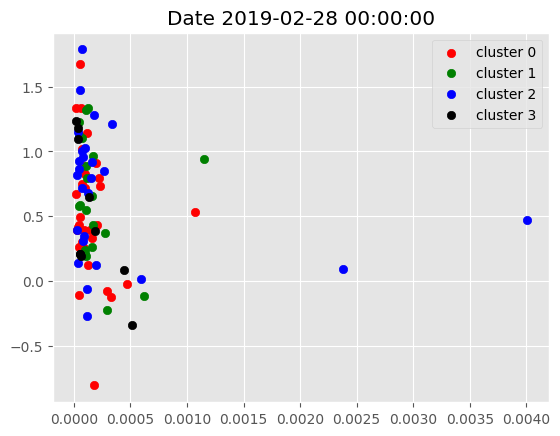

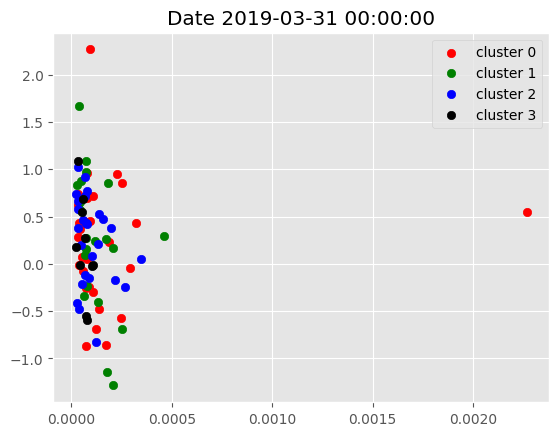

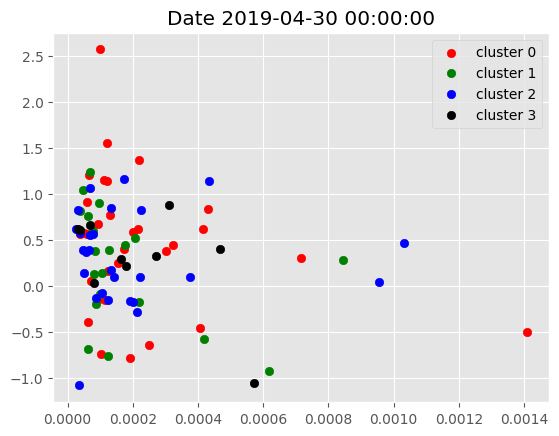

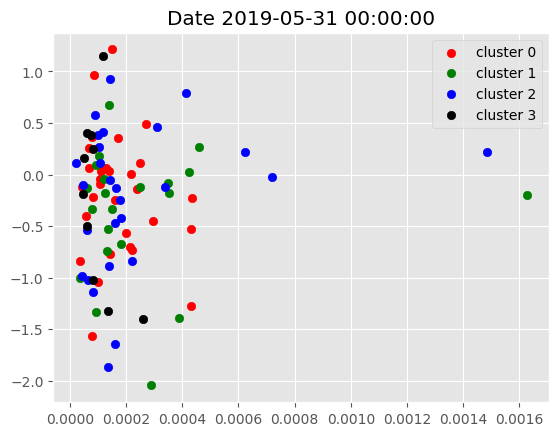

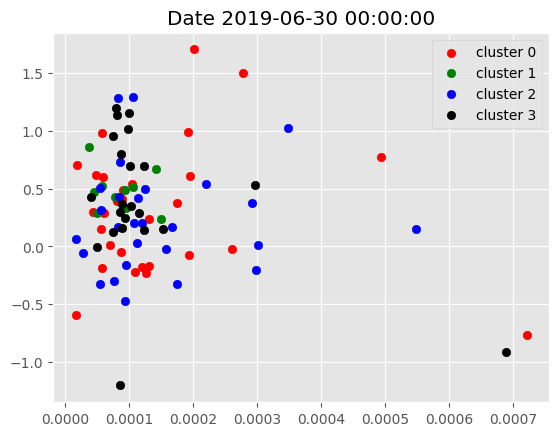

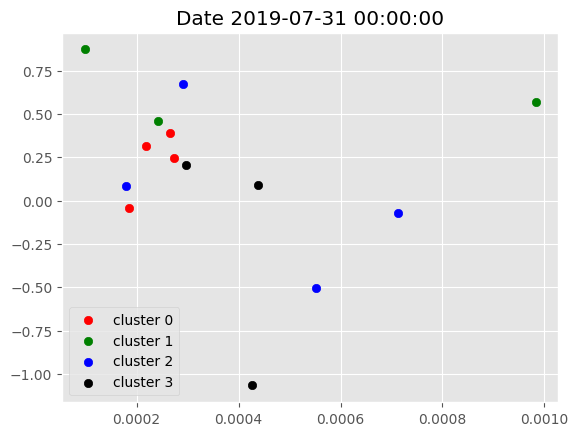

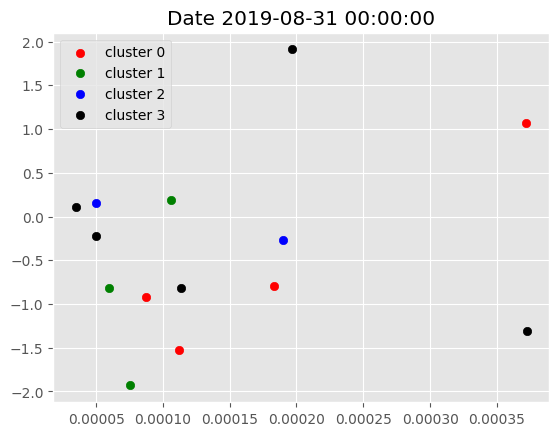

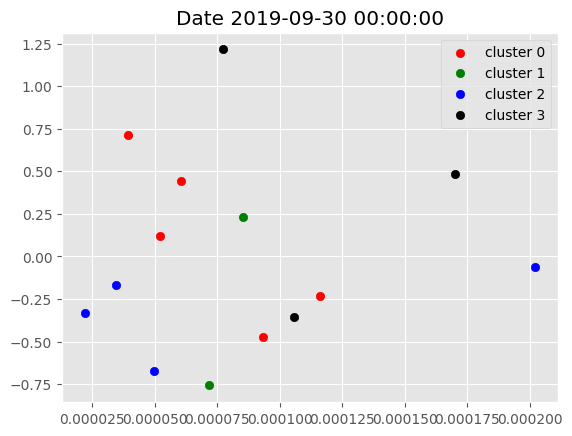

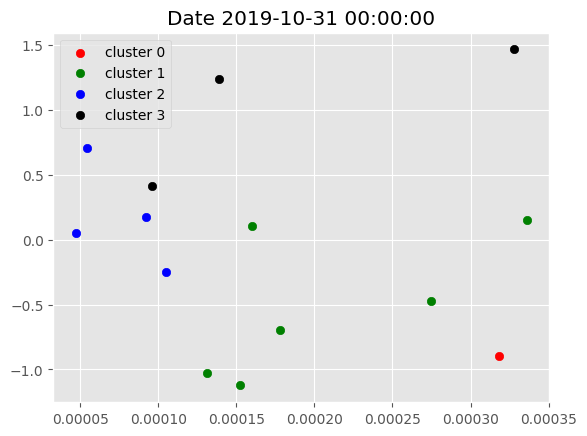

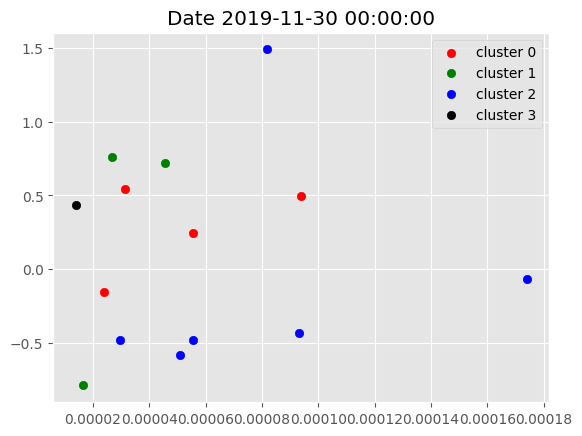

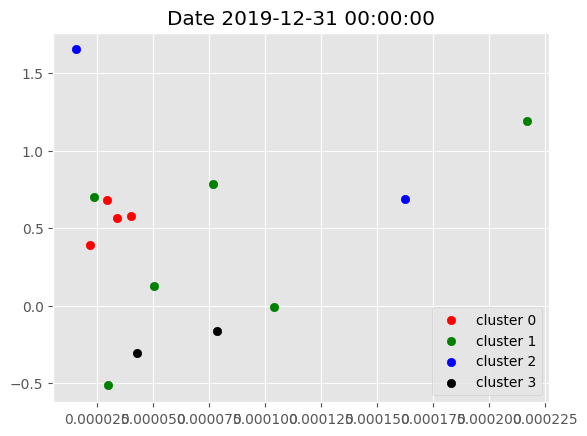

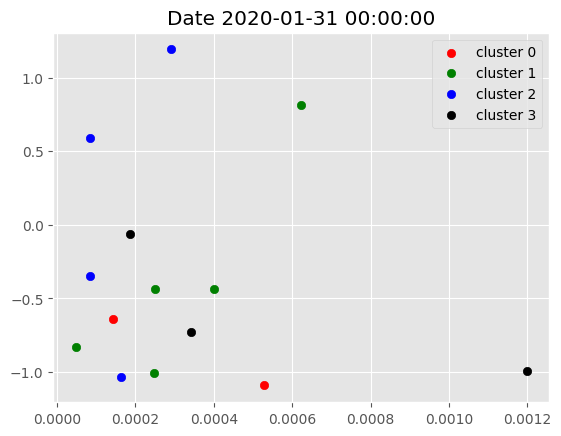

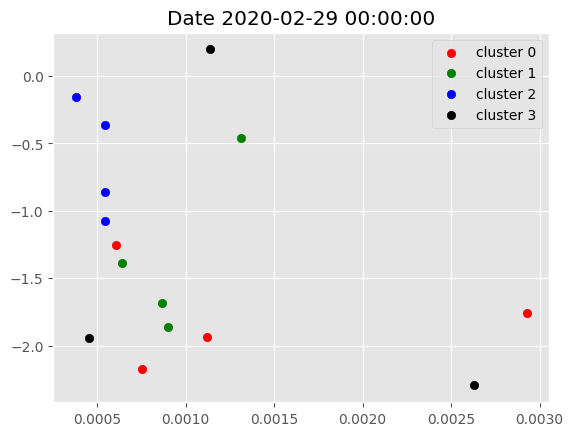

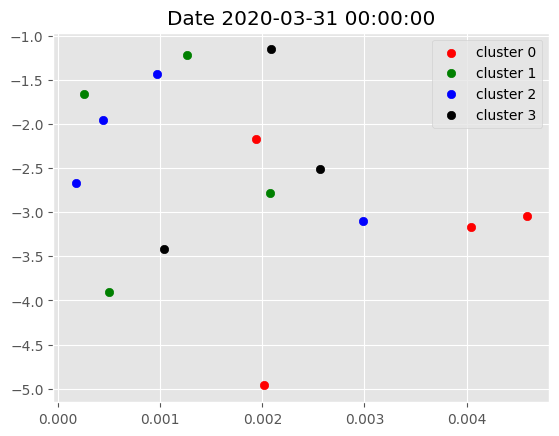

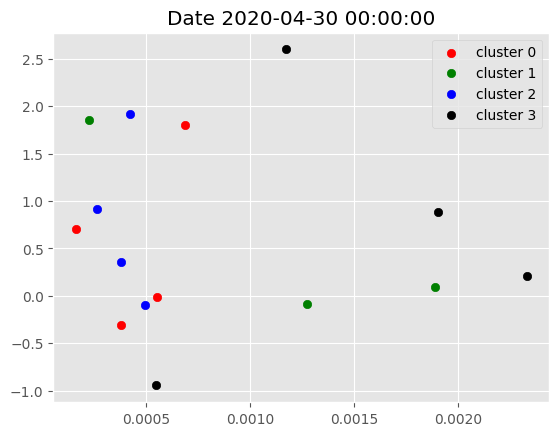

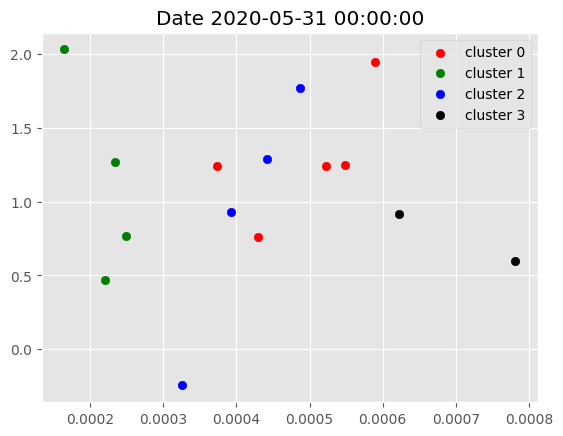

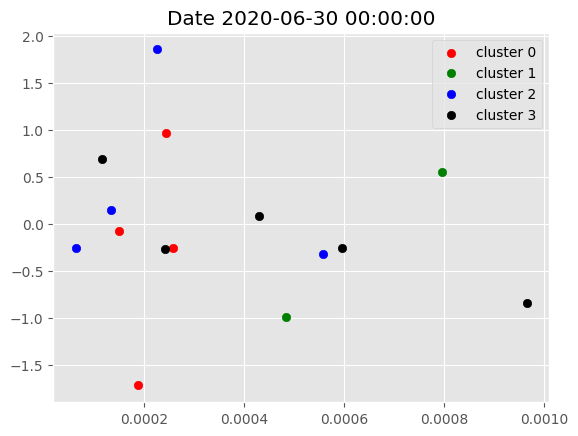

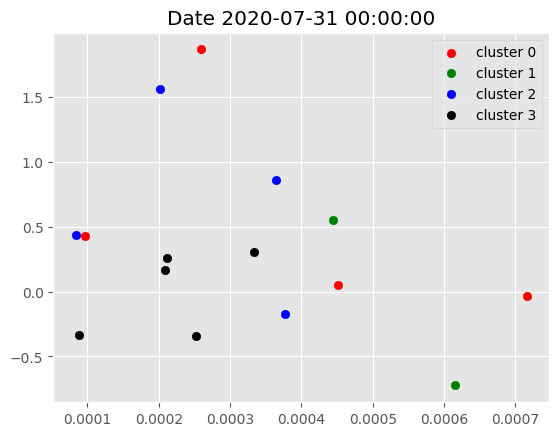

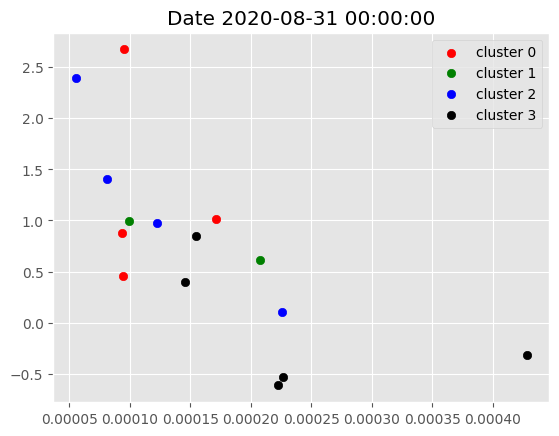

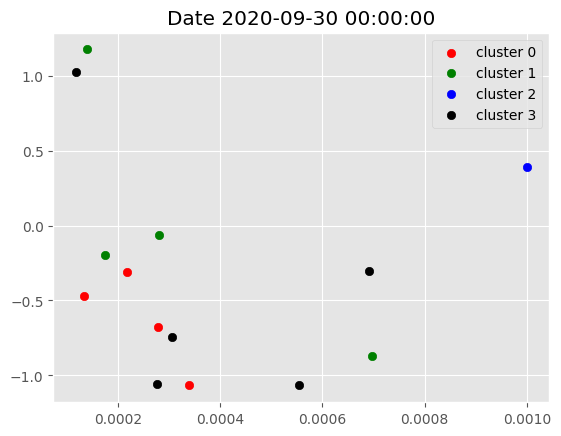

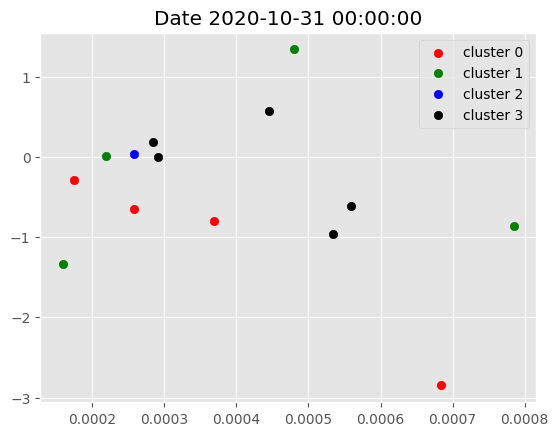

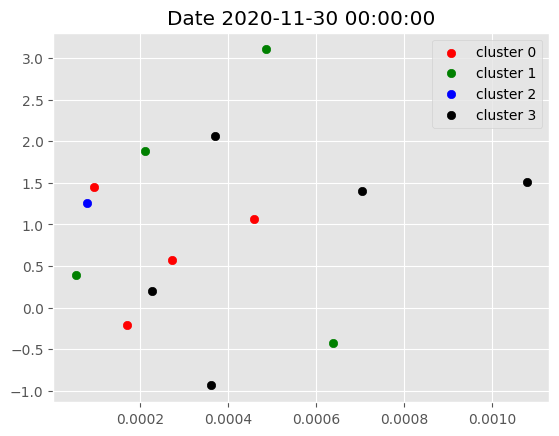

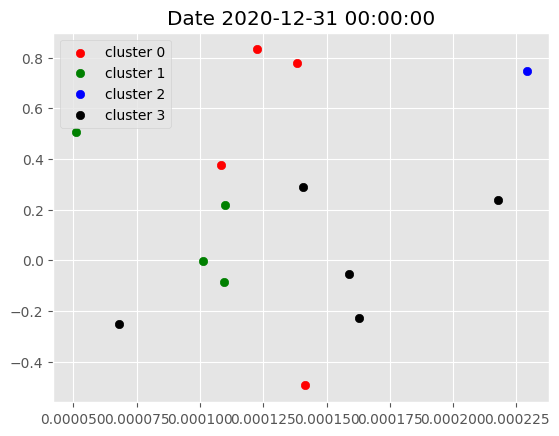

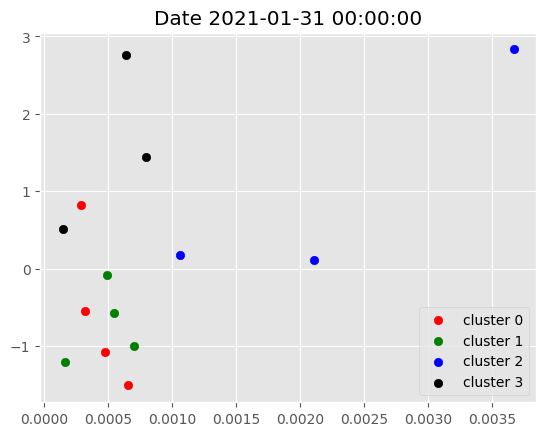

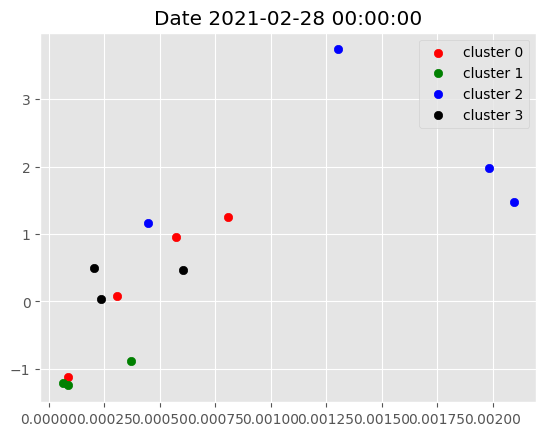

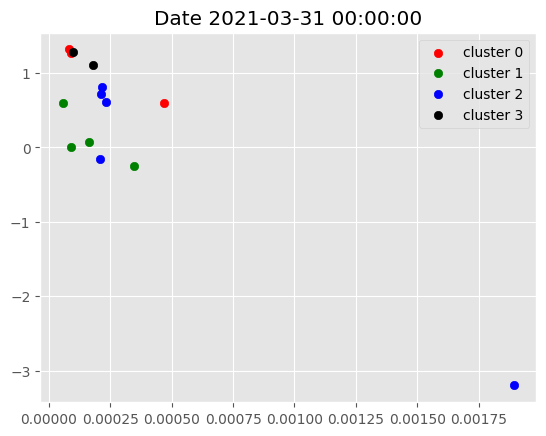

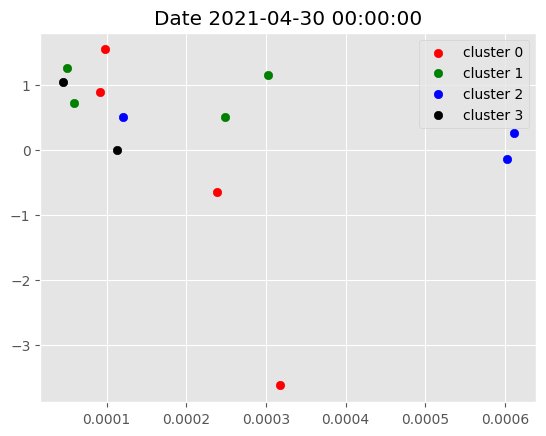

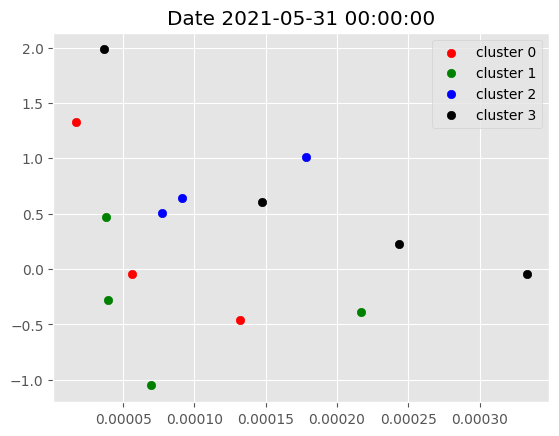

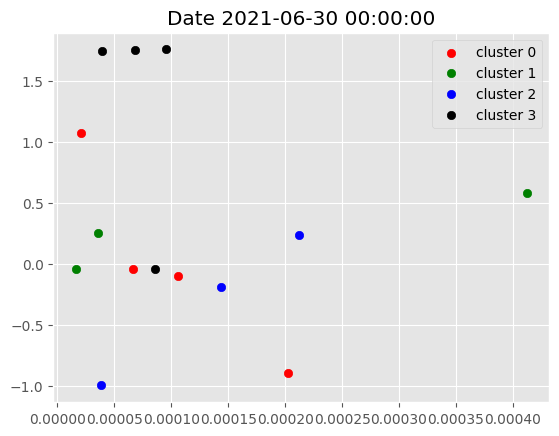

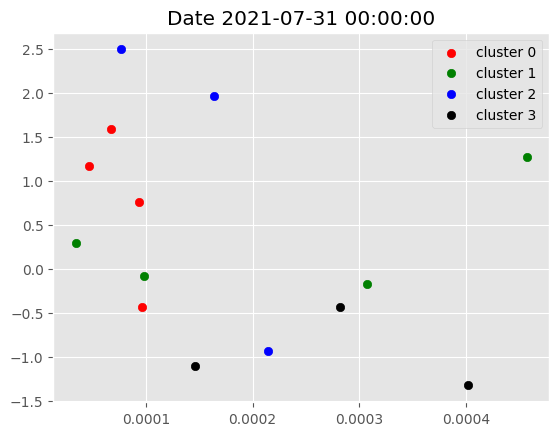

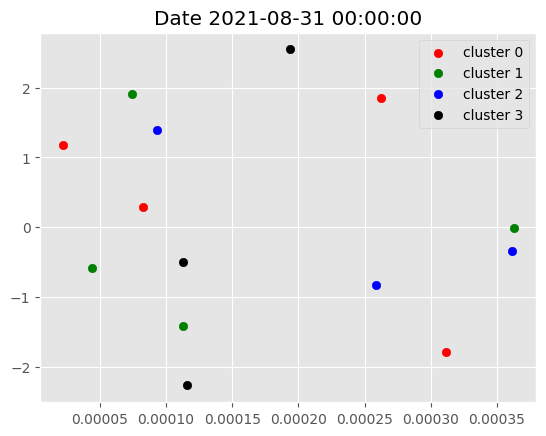

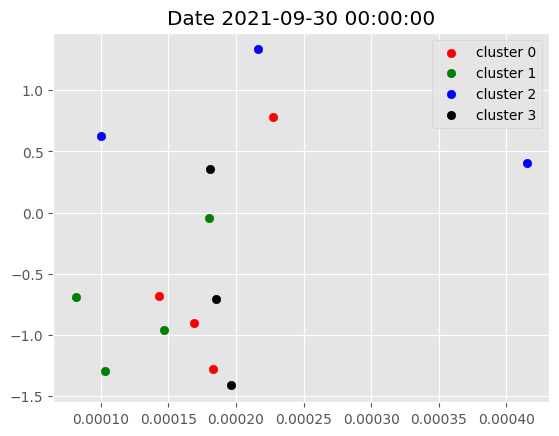

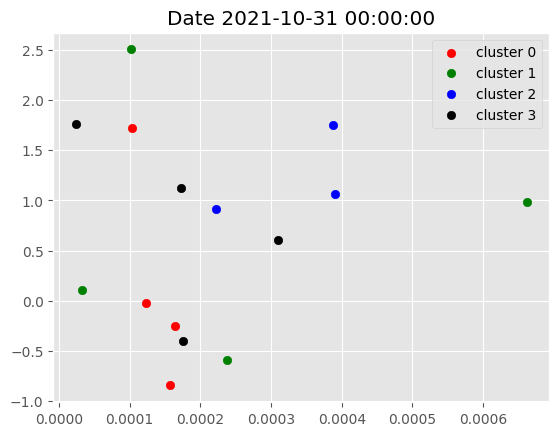

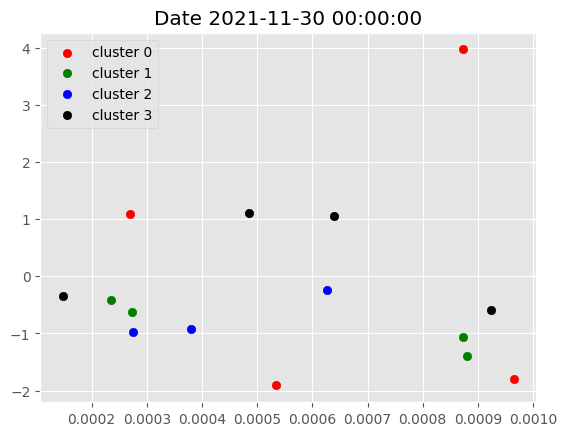

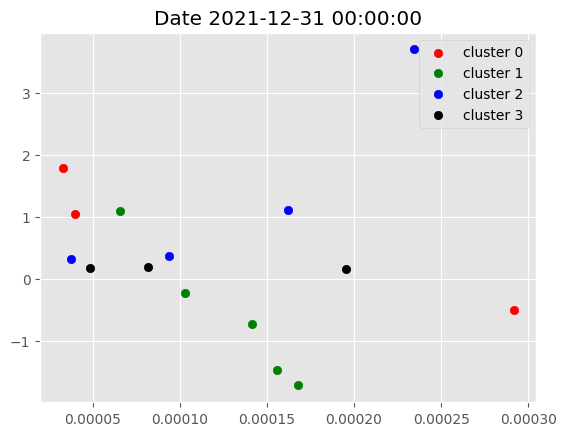

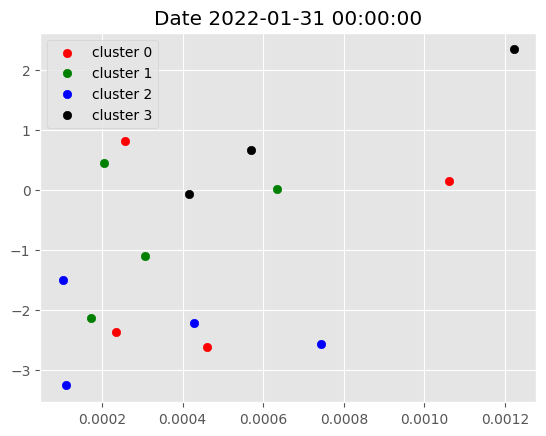

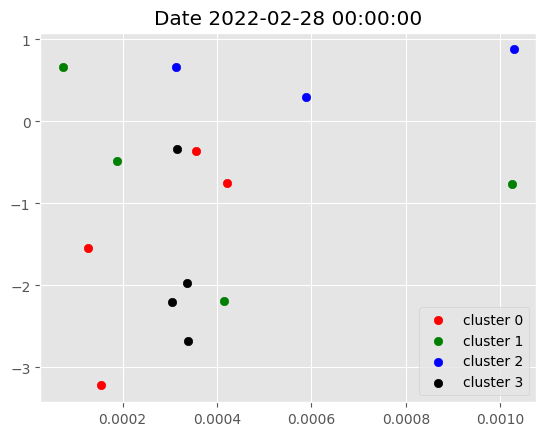

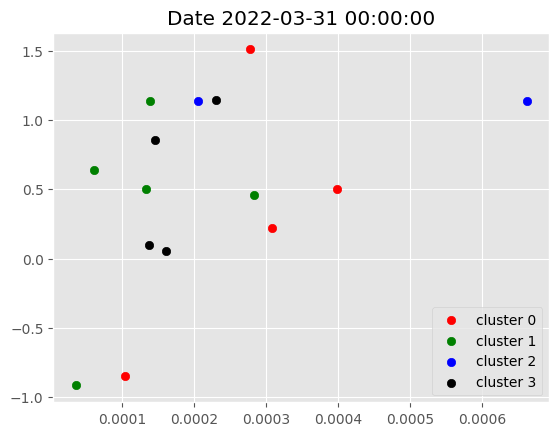

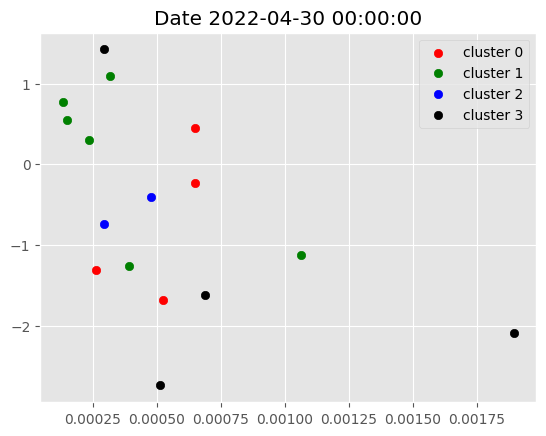

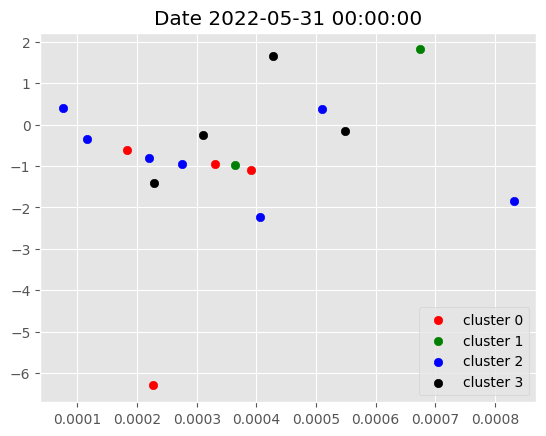

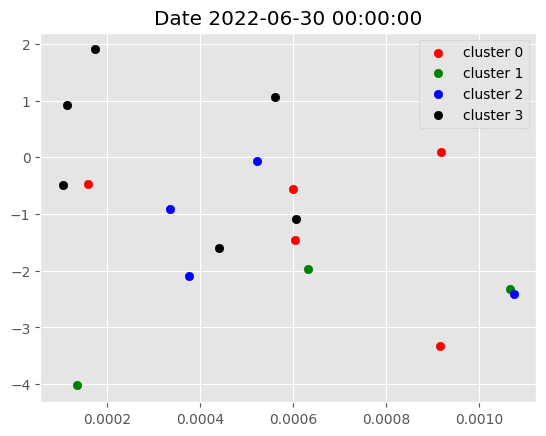

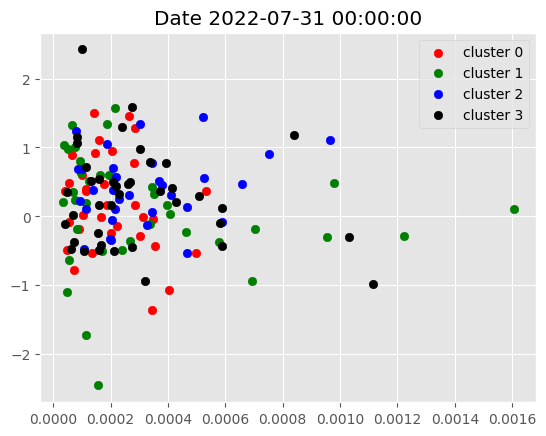

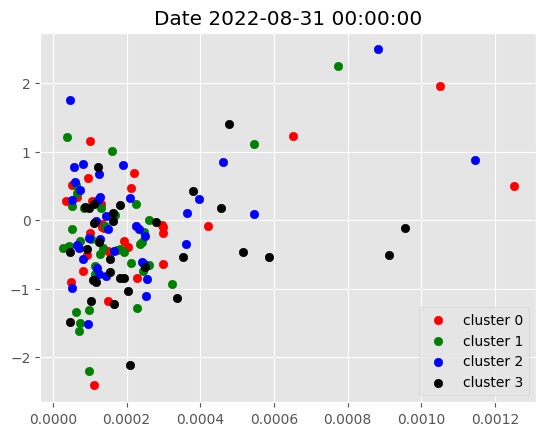

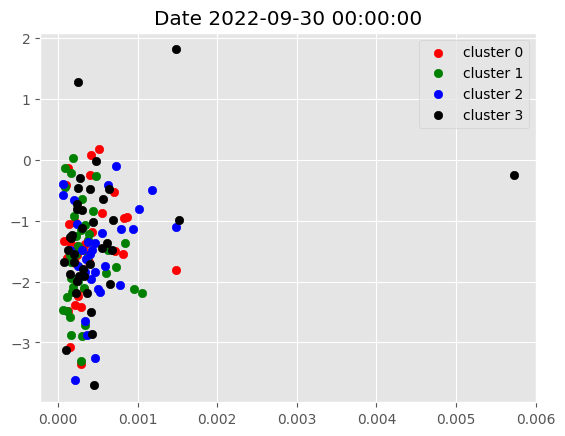

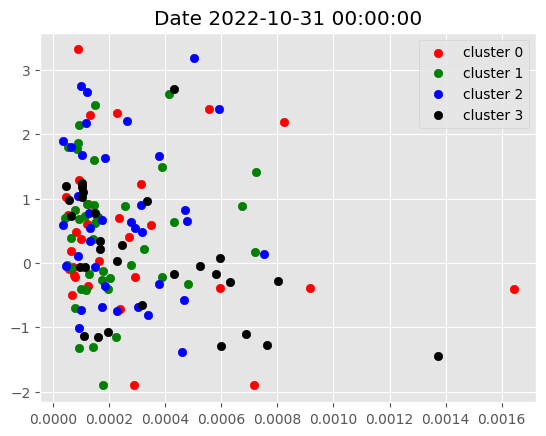

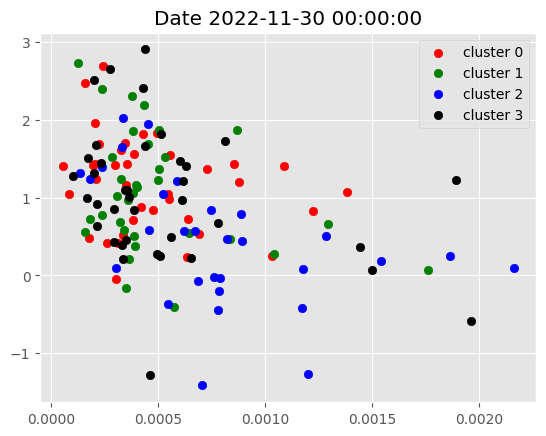

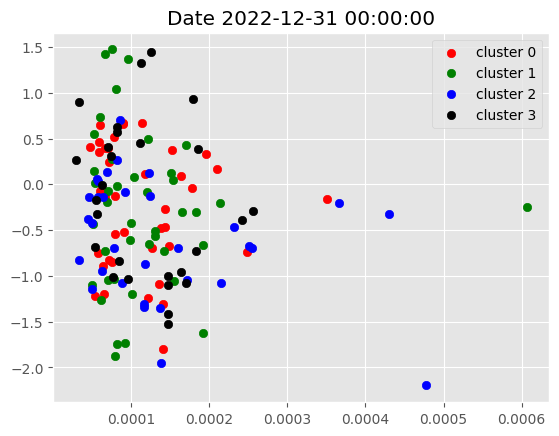

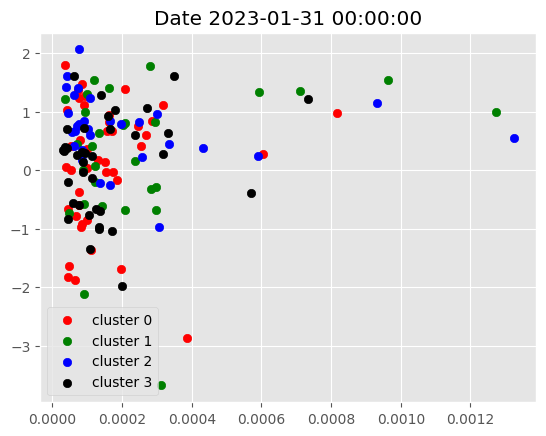

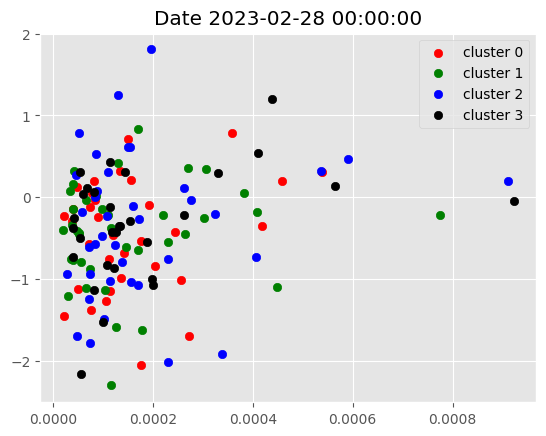

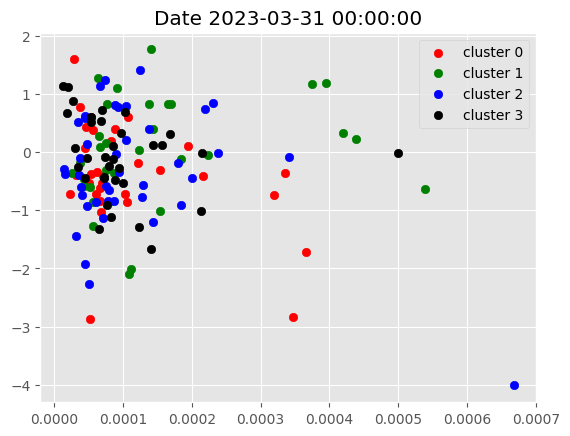

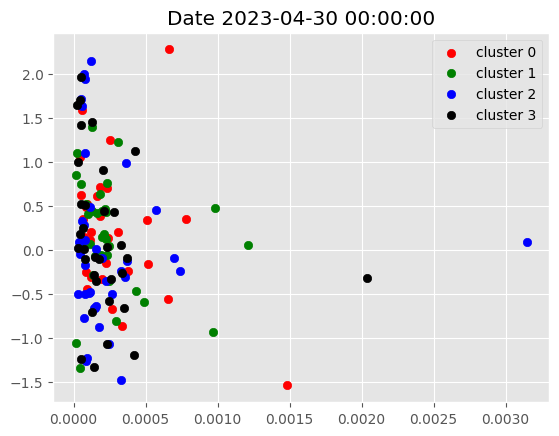

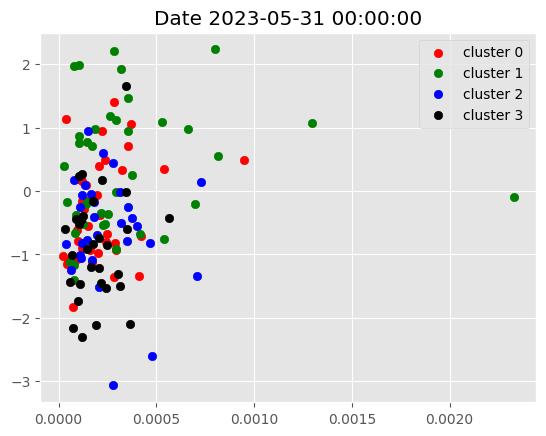

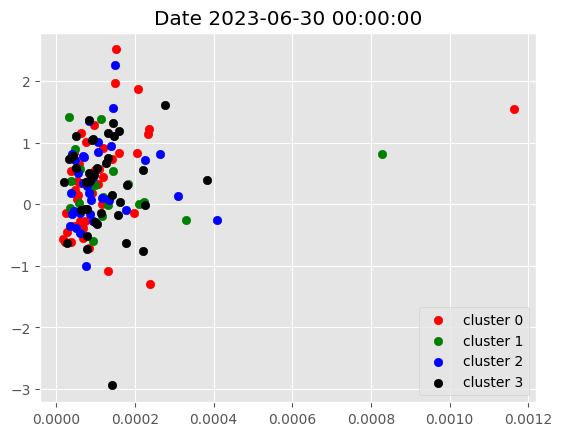

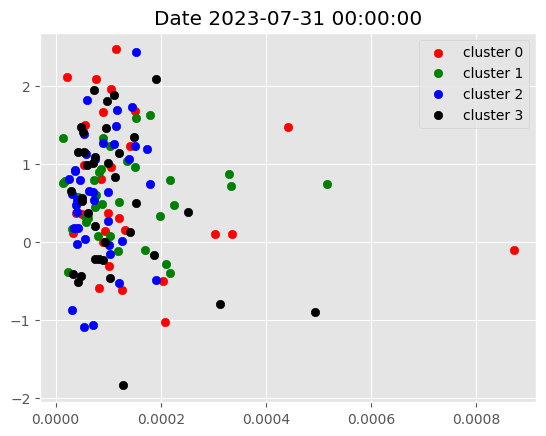

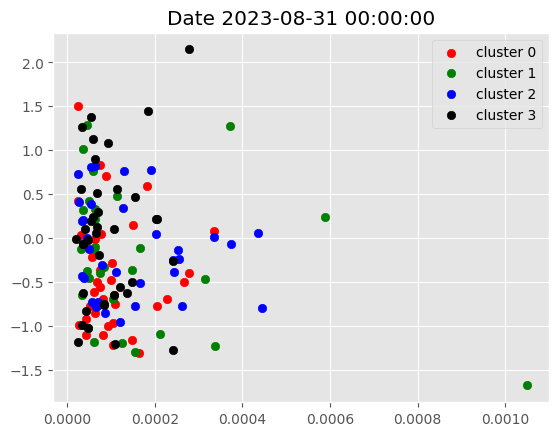

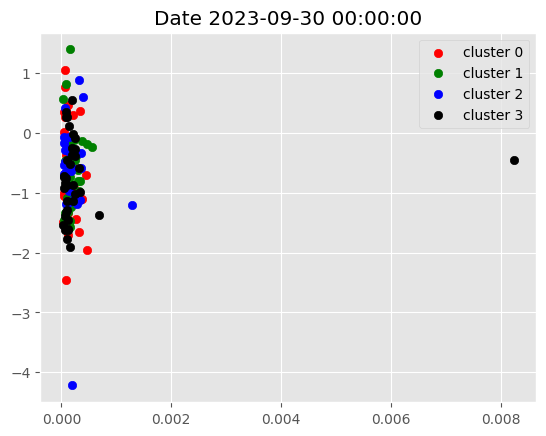

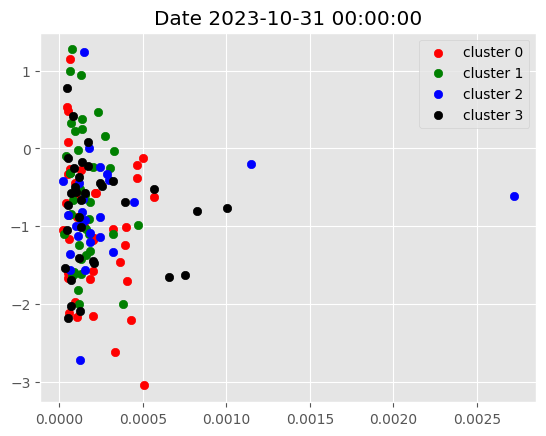

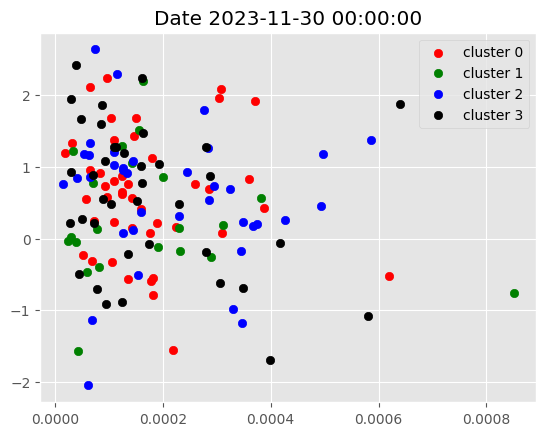

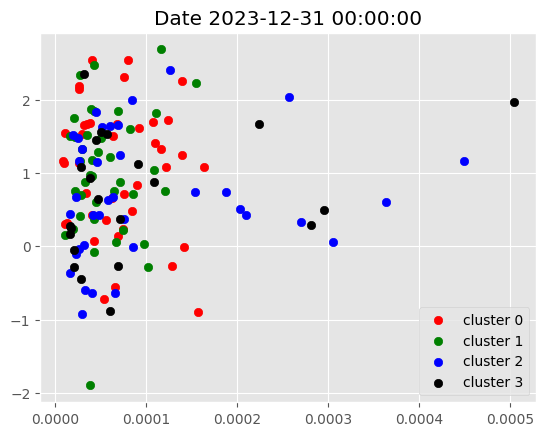

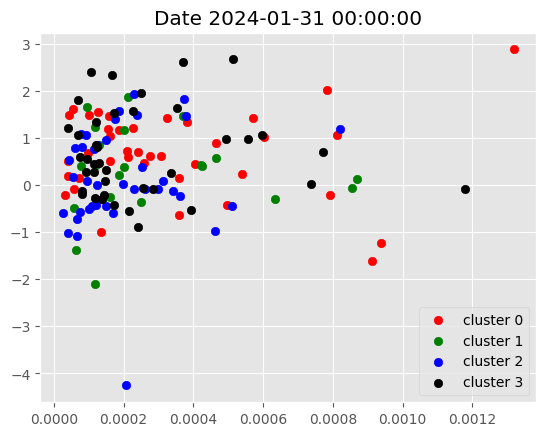

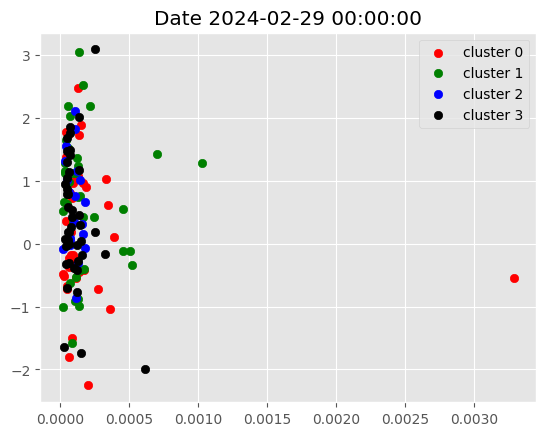

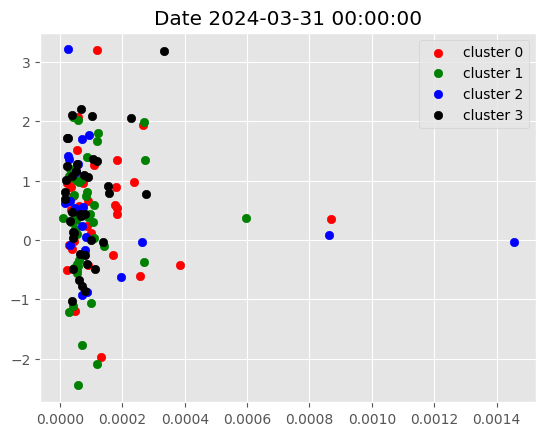

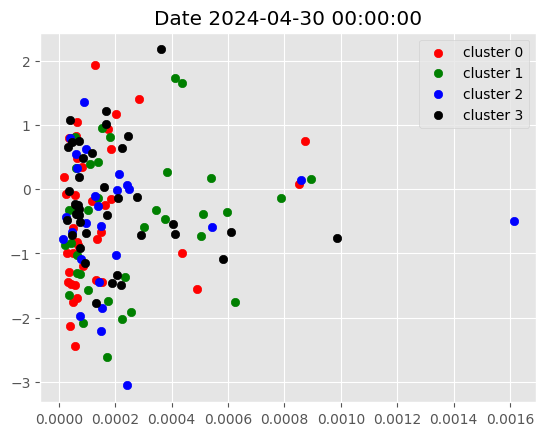

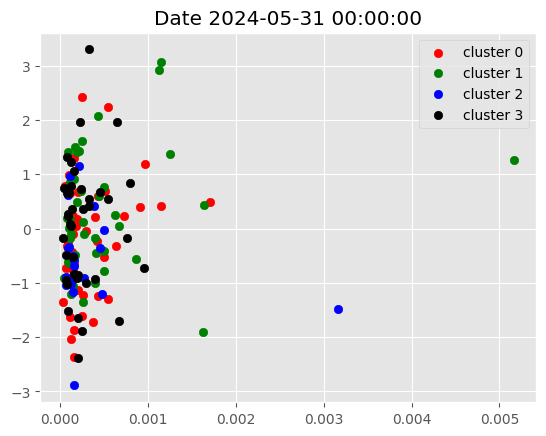

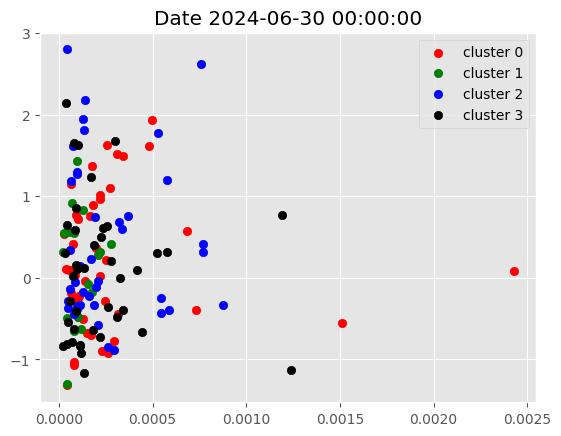

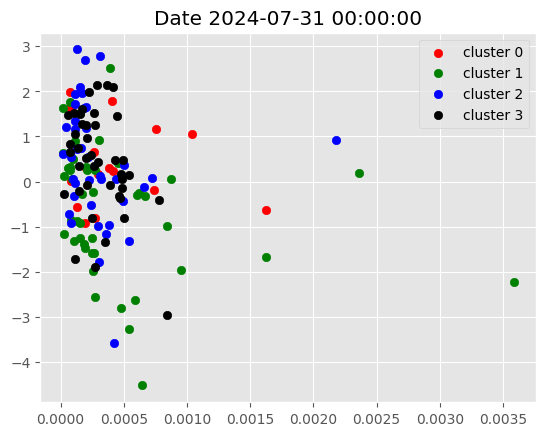

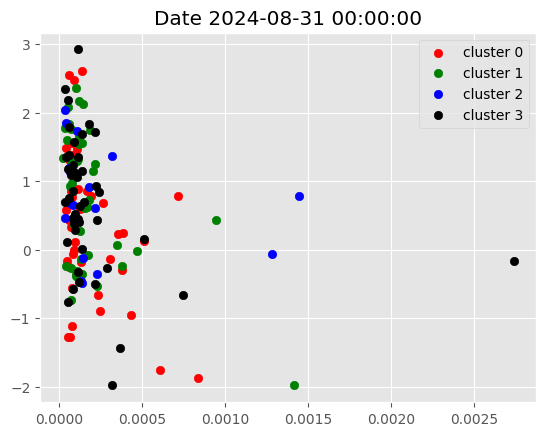

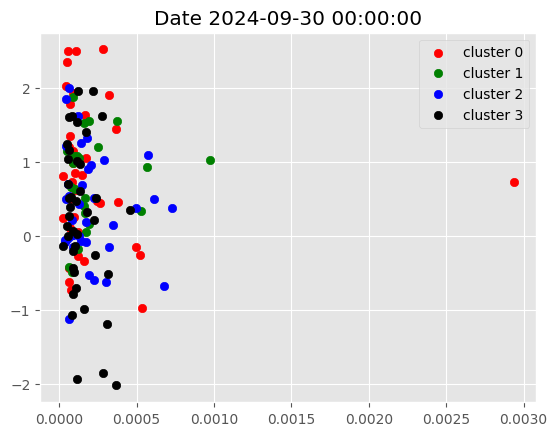

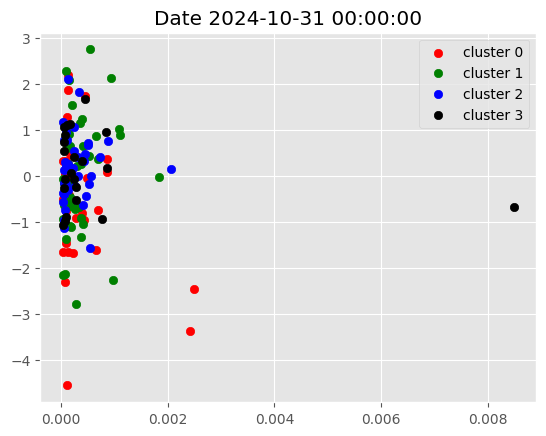

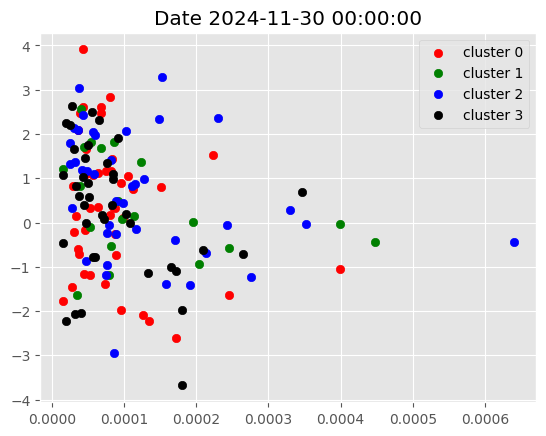

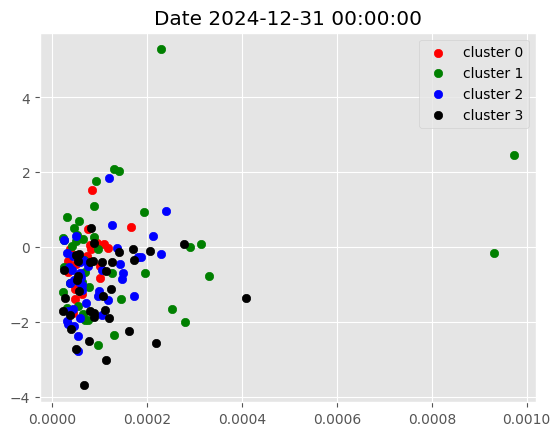

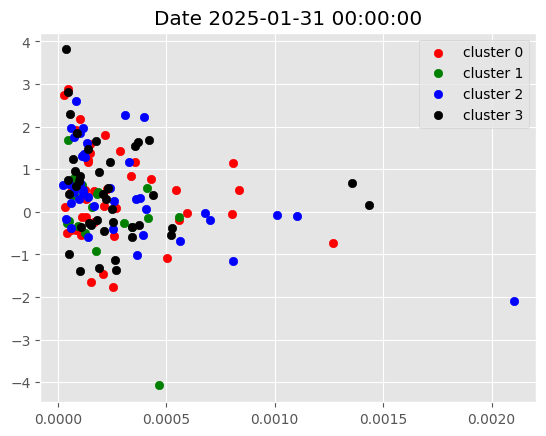

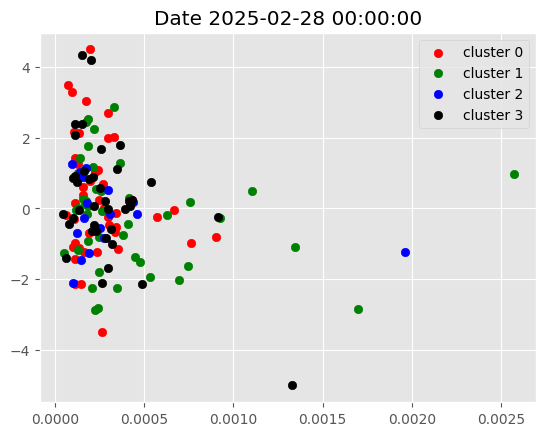

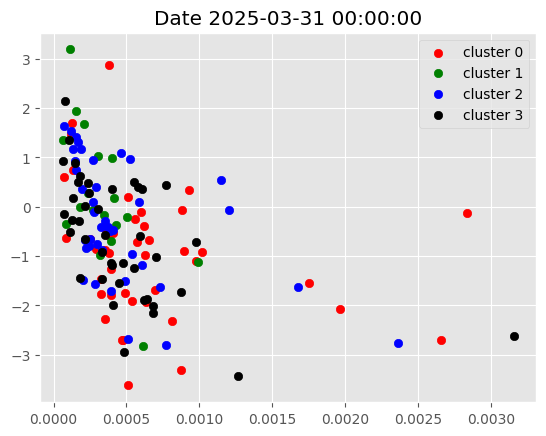

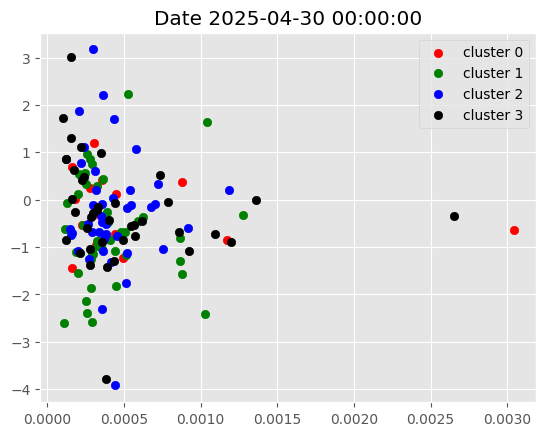

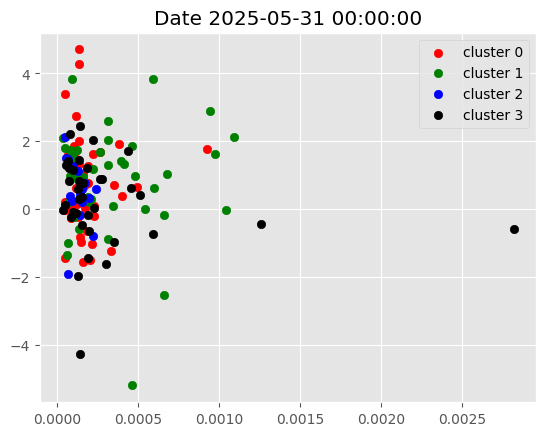

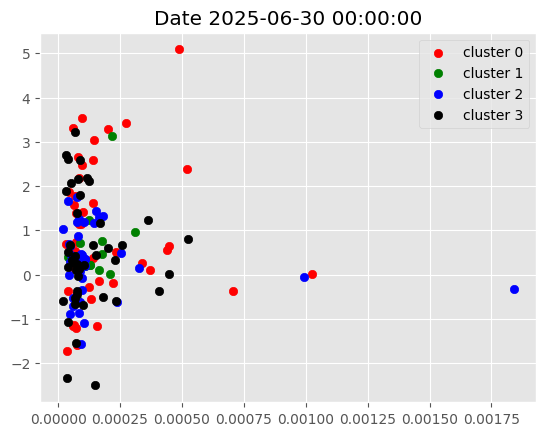

In [ ]:
plt.style.use("ggplot")

for i in data.index.get_level_values("date").unique().tolist():

    g = data.xs(i, level=0)

    plt.title(f"Date {i}")

    plot_clusters(g)

# 7. For each month select assets based on the cluster and form a portfolio based on Efficient Frontier max sharpe ratio optimization
First we will filter only stocks corresponding to the cluster we choose based on our hypothesis.

Momentum is persistent and my idea would be that stocks clustered around RSI 70 centroid should continue to outperform in the following month - thus I would select stocks corresponding to cluster 3.

In [ ]:
filtered_df = data[data["cluster"] == 3].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index + pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(["date", "ticker"])

dates = filtered_df.index.get_level_values("date").unique().tolist()

fixed_dates = {}

for d in dates:

    fixed_dates[d.strftime("%Y-%m-%d")] = filtered_df.xs(d, level=0).index.tolist()

fixed_dates

{'2018-08-01': ['AKAM',
  'ALGN',
  'AMP',
  'CAH',
  'CF',
  'COR',
  'DPZ',
  'FE',
  'FIS',
  'FITB',
  'HST',
  'KMX',
  'LULU',
  'MLM',
  'NEM',
  'NOW',
  'PEG',
  'PHM',
  'PPL',
  'SBAC',
  'SYK',
  'TEL',
  'TT',
  'VMC',
  'WBD'],
 '2018-09-01': ['ARE',
  'AXON',
  'CPRT',
  'CRL',
  'EG',
  'ENPH',
  'FICO',
  'GL',
  'GPC',
  'GRMN',
  'LII',
  'LKQ',
  'MKTX',
  'NVR',
  'NWS',
  'PFG',
  'STE',
  'TRGP',
  'UDR',
  'WST',
  'ZBRA'],
 '2018-10-01': ['ARE',
  'AXON',
  'CPRT',
  'CRL',
  'EG',
  'ENPH',
  'FICO',
  'GL',
  'GPC',
  'GRMN',
  'LII',
  'LKQ',
  'MKTX',
  'NVR',
  'NWS',
  'PFG',
  'STE',
  'TRGP',
  'UDR',
  'WST',
  'ZBRA'],
 '2018-11-01': ['AKAM',
  'ALGN',
  'AMP',
  'APD',
  'CAH',
  'CCI',
  'CF',
  'COR',
  'DUK',
  'FITB',
  'GLW',
  'INTU',
  'KMX',
  'LULU',
  'MLM',
  'MNST',
  'NEM',
  'NOW',
  'PHM',
  'SBAC',
  'SYK',
  'TEL',
  'TT',
  'VMC',
  'WBD'],
 '2018-12-01': ['AMP',
  'BALL',
  'CAG',
  'DGX',
  'DLR',
  'DPZ',
  'EFX',
  'EMN',
  'EQR